In [276]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sbd
"""import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *"""
warnings.filterwarnings('ignore')

# Aim:
## 1) Using preprocessed `abstract file`, `ingredients list` and the `material properties list` find the number of abstracts, in which `two` or `three` specific ingredients/material properties co-exist amongst all the abstracts.
## 2) Find the number of abstracts, in which any `two` ingredients or material property or a combination of two, co-exits and get a `visualisation` for it.
## 3) Create `functions` which allow us to `view` and `download` the abstracts which contains a `pair` or `triplet` of material properties / ingredients or a mix, simultaneously.
## 4) Prepare two excel sheet, with `material properties` as columns and `ingredients` as indices where the cell containing 
- (1) **Number of abstracts (research paper), selected words (ingredients or material properties) coexist in**
- (2) **Document id of abstracts, selected words (ingredients / material properties) co-exits in**


### importing necessary files

In [277]:
df = pd.read_excel('lem_manual_bow_frequency_percentage_v9.xlsx')
pd.set_option('display.max_colwidth',180)
df.head(5)

,Title,original_abs,Year,doc_id,Abstract,word_freq,bow_percent,mat_prop,mat_percent,numwords
0,New tool for sustainable treatments: agar spray—research and practice,"last decades, research field of cultural heritage shifted attention development of green methods, focusing use of renewable biodegradable materials. within scenario, agar one o...",2022,0,last decades research field of cultural heritage shifted attention development of green method focusing use of renewable biodegradable material within scenario agar one of inno...,agar: 5,3.52,"transparency: 1, water vapor: 1",1.41,142
1,Barrier effect and wound healing activity of the medical device REF-FTP78 in the treatment of gastroesophageal reflux disease,ref-ftp78 class iib medical device present market different trade name developed treatment of gastroesophageal reflux disease (gerd). medical device based polysaccharide aloe b...,2022,1,ref ftp78 class iib medical device present market different trade name developed treatment of gastroesophageal reflux disease gerd medical device based polysaccharide aloe barb...,fucoidan: 1,0.64,"abts: 1, dpph: 1",1.28,156
2,Preparation and application of a colorimetric film based on sodium alginate/sodium carboxymethyl cellulose incorporated with rose anthocyanins,"monitor freshness of penaeus vannamei storage, colorimetric film based sodium alginate/sodium carboxymethyl cellulose incorporated rose anthocyanins extract (rae) prepared. res...",2022,2,monitor freshness of penaeu vannamei storage colorimetric film based sodium alginate sodium carboxymethyl cellulose incorporated rose anthocyanin extract rae prepared result sh...,"alginate: 1, anthocyanin: 1, cellulose: 1, sodium: 2",4.63,"color: 3, ftir: 1, moisture content: 1, ph: 2, water contact angle: 1, water vapor: 1",8.33,108
3,Fabrication and characterization of bio-nanocomposite films using κ-Carrageenan and Kappaphycus alvarezii seaweed for multiple industrial applications,"present study, whole seaweed kappaphycus alvarezii (containing carrageenan) used preparation of bio-nanocomposite film blending metal oxide nanoparticles zinc oxide (znonps), c...",2022,3,present study whole seaweed kappaphycu alvarezii containing carrageenan used preparation of bio nanocomposite film blending metal oxide nanoparticles zinc oxide znonp cupric ox...,"carrageenan: 3, silicon: 1, zinc: 1",3.62,"antibacterial: 2, antimicrobial: 1, aureus: 1, coli: 1, moisture content: 1, roughness: 2, staphylococcus: 1, tensile strength: 1, transmittance: 1, water uptake ratio: 1",8.70,138
4,Adjustable polysaccharides-proteins films made of aqueous wheat proteins and alginate solutions,large amount of wheat protein by-product produced wheat starch manufacture. work aimed develop edible film of cast aqueous wheat protein (wp) alginate (al) solutions. investiga...,2022,4,large amount of wheat protein by product produced wheat starch manufacture work aimed develop edible film of cast aqueou wheat protein wp alginate al solution investigation of ...,"alginate: 1, starch: 1, wheat: 3",4.67,water vapor: 1,0.93,107


In [278]:
df.loc[[534, 535, 536, 537]]

,Title,original_abs,Year,doc_id,Abstract,word_freq,bow_percent,mat_prop,mat_percent,numwords
534,Using cellulose nanofibers to reinforce polysaccharide films: Blending vs layer-by-layer casting,based electrostatic interaction mechanism cellulose nanofiber (cnf) utilized reinforcing additive fabricate polysaccharide film (alginate (alg) chitosan (ch)) two methods: blen...,2020,534,based electrostatic interaction mechanism cellulose nanofiber cnf utilized reinforcing additive fabricate polysaccharide film alginate alg chitosan ch two method blending layer...,"alginate: 1, cellulose: 1, chitosan: 1",2.94,"ftir: 1, opacity: 1, tensile strength: 1, water vapor: 1",3.92,102
535,Characterization of Agar-CMC/Ag-MMT nanocomposite and evaluation of antibacterial and mechanical properties for packaging applications,effect of silver modified montmorillonite (ag-mmt) physical mechanical antimicrobial property of agar-carboxymethyl cellulose (agar-cmc) bionanocomposites film prepared solutio...,2020,535,effect of silver modified montmorillonite ag mmt physical mechanical antimicrobial property of agar carboxymethyl cellulose agar cmc bionanocomposites film prepared solution in...,"agar: 6, cellulose: 2, clay: 1, montmorillonite: 1, silver: 1",14.10,"antibacterial: 2, antimicrobial: 1, bacillus: 1, coli: 1, transmittance: 1, x ray diffraction: 1",8.97,78
536,PREPARATION AND REGULATION OF STRUCTURALMECHANICAL PROPERTIES OF BIODEGRADABLE FILMS BASED ON STARCH AND AGAR,problem of recycling polymer waste one of actual problems. one way solve problem create biodegradable food packaging. mixing solution of starch agar different mass ratio of pol...,2020,536,problem of recycling polymer waste one of actual problem one way solve problem create biodegradable food packaging mixing solution of starch agar different mass ratio of polyme...,"agar: 6, glycerol: 1, starch: 7",7.49,"deformation: 1, roughness: 3",2.14,187
537,Preparation of carbohydrate-based functional composite films incorporated with curcumin,functional film made solution casting using three different type of carbohydrate (agar chitosan carrageenan) curcumin. field emission scanning electron microscopy (fe-sem) four...,2020,537,functional film made solution casting using three different type of carbohydrate agar chitosan carrageenan curcumin field emission scanning electron microscopy fe sem fourier t...,"agar: 2, carrageenan: 2, chitosan: 2",5.26,"antibacterial: 1, fourier transform infrared: 1, ftir: 1, release rate: 2, scanning electron microscopy: 1, swelling ratio: 2, water vapor: 1",7.89,114


In [279]:
df.fillna('', inplace = True)
df.sample(2)

,Title,original_abs,Year,doc_id,Abstract,word_freq,bow_percent,mat_prop,mat_percent,numwords
471,Mechanical properties of films from carboxy methyl glucomannan and carrageenan with glycerol as plasticizer,edible film carboxymethylglucomannan (cmg) carrageenan glycerol plasticizer possible minimize environmental pollution. effect of composition of solid material addition of glyce...,2020,471,edible film carboxymethylglucomannan cmg carrageenan glycerol plasticizer possible minimize environmental pollution effect of composition of solid material addition of glycerol...,"carrageenan: 3, glycerol: 5",6.96,"elastic modulus: 1, tensile strength: 3",3.48,115
547,Preparing and characterization of St.John's Wort (Hypericum perforatum) incorporated wound dressing films based on chitosan and gelatin [Sarı Kantaron (Hypericum perforatum) ka...,work st. john's wort (hypericum perforatum) supported wound dressing film based chitosan gelatin prepared using solvent casting technique. wound dressing film structure confirm...,2020,547,work st john wort hypericum perforatum supported wound dressing film based chitosan gelatin prepared using solvent casting technique wound dressing film structure confirmed fti...,"agar: 1, chitosan: 2, gelatin: 2",3.82,"antibacterial: 2, aureus: 1, coli: 1, ftir: 1, ph: 2, thickness: 1, water absorption: 2, water vapor: 2",9.16,131


In [280]:
df['mat_prop'] = df['mat_prop'].apply(lambda x: ', ' + str(x))

In [281]:
df['mix'] = df['word_freq'] + df['mat_prop']
df['mix'] = df['mix'].apply(lambda x: ', ' + str(x))
pd.set_option('display.max_colwidth', 80)
df.sample(3)

,Title,original_abs,Year,doc_id,Abstract,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
236,Properties of alginate films incorporated with free and microencapsulated St...,alginate-based film functional property improved incorporation of bioactive ...,2021,236,alginate based film functional property improved incorporation of bioactive ...,"alginate: 4, gum: 2, xanthan: 2, xanthan gum: 2",11.11,", ftir: 1, lipid oxidation: 1, thermal stability: 1, water vapor: 1",4.44,90,", alginate: 4, gum: 2, xanthan: 2, xanthan gum: 2, ftir: 1, lipid oxidation:..."
1583,Biocomposites prepared by alkaline phosphatase mediated mineralization of al...,study set develop biomimetic scaffold incorporating osteoinductive hydroxyap...,2012,1583,study set develop biomimetic scaffold incorporating osteoinductive hydroxyap...,"alginate: 3, calcium: 1",3.81,", scanning electron microscopy: 1, thermal stability: 1, x ray diffraction: 1",2.86,105,", alginate: 3, calcium: 1, scanning electron microscopy: 1, thermal stabilit..."
868,Softening and Shape Morphing of Stiff Tough Hydrogels by Localized Unlocking...,mechanical property (e.g. stiffness stretchability) of prefabricated hydroge...,2018,868,mechanical property e g stiffness stretchability of prefabricated hydrogel o...,alginate: 1,0.70,",",0.00,143,", alginate: 1,"


## Necessary functions required to get desired results : 

1) **namefun(word)** -- Enter any material property/ingredient in the namefun, function, and you will get the number of abstract this word exist in. <br>
2) **nameidx(word)** -- Enter any material property/ingredient in this function and it will give you the indices of the abstract this selected ingredient/material property exist in.<br>
3) **nooftimes(firstn, secondn)**: -- Enter any two material properties/ingredients or a mix of both, and it gives you number of abstract they coexist in.<br>
4) **twonamefun(firstn, secondn)**: -- Enter any two material properties/ingredients or a mix of both, and it gives you the indices of abstract they coexist in.<br>
5) **doclst(firstn, secondn)**: -- Outputs all document id, of all the abstracts these two material properties/ingredients or a mix of both coexist in.<br>
6) **printdf(firstn , secondn)**: -- Outputs a dataframe which contains all the details of abstracts these two material properties/ingredients of a mix of both, coexists in.<br>

In [282]:
def namefun(firstn):
    firstn = ', ' + firstn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    print(len(nidx))

def nameidx(firstn):
    firstn = ', ' + firstn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    return nidx

def nooftimes(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    return(len(nindex))

def twonamefun(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    print(len(nindex))
    return nindex

def doclst(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    docitems = df.loc[nindex].doc_id.tolist()
    return docitems

def printdf(firstn , secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    
    dataf =  df.loc[nindex]
    dataf = dataf.drop(['Abstract'],axis =1)
    return dataf
    

### Examples below: 

In [283]:
namefun('swelling')

0


In [284]:
printdf('edible', 'agar')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix


In [285]:
print(doclst('strain', 'corn'))

[]


In [286]:
printdf('corn', 'strain')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix


In [287]:
print(doclst('water vapor', 'corn'))

[89, 216, 917, 1187, 1211, 1498, 1742, 1954]


In [288]:
printdf('water vapor', 'gum')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
22,Development and characterization of an antimicrobial edible film from basil ...,edible film recent trend field of packaging economic biodegradable. biodegra...,2022,22,"agar: 1, alginate: 1, gum: 1",1.68,", antimicrobial: 4, aureus: 1, coli: 1, opacity: 1, staphylococcus: 1, tensi...",7.26,179,", agar: 1, alginate: 1, gum: 1, antimicrobial: 4, aureus: 1, coli: 1, opacit..."
28,Development of shrimp freshness indicating films by immobilizing red pitaya ...,double-layer film prepared immobilizing red pitaya betacyanins titanium diox...,2022,28,"agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl a...",13.14,", color: 3, tensile strength: 1, thickness: 1, water vapor: 1",4.38,137,", agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl..."
37,Sodium alginate/gum arabic/glycerol multicomponent edible films loaded with ...,"sweet potato (ipomonea batatas lam) easily damaged due thin skin, limited sh...",2022,37,"alginate: 2, glycerol: 1, gum: 1, natamycin: 5, potato: 5, sodium: 2, starch: 1",10.06,", antibacterial: 5, antimicrobial: 1, ph: 1, tensile strength: 1, thermal st...",7.10,169,", alginate: 2, glycerol: 1, gum: 1, natamycin: 5, potato: 5, sodium: 2, star..."
52,Antioxidant coatings from elastomeric vinyl acetate-vinyl laurate copolymers...,"vinyl laurate-based elastomeric copolymer, developed chewing gum base, used ...",2022,52,"acetic acid: 1, alginate: 2, gelatin: 2, gum: 1, methyl: 1",5.60,", abts: 1, dpph: 1, transparent: 1, water vapor: 1",3.20,125,", acetic acid: 1, alginate: 2, gelatin: 2, gum: 1, methyl: 1, abts: 1, dpph:..."
61,Active/intelligent packaging films developed by immobilizing anthocyanins fr...,active/intelligent packaging film developed incorporating purple sweetpotato...,2022,61,"alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust bean...",11.59,", color: 1, ph: 1, tensile strength: 1, water vapor: 1",2.90,138,", alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust be..."
89,Properties of film-forming emulsions and films based on corn starch/sodium a...,"effect of virgin coconut oil (vco) content (10%, 30%, 50%, 70%, based mass o...",2022,89,"alginate: 1, coconut: 1, corn: 1, gum: 2, sodium: 1, starch: 1, virgin cocon...",8.51,", oxygen permeability: 1, tensile strength: 1, water contact angle: 1, water...",4.26,94,", alginate: 1, coconut: 1, corn: 1, gum: 2, sodium: 1, starch: 1, virgin coc..."
110,Layer-by-layer assembly of lysozyme with iota-carrageenan and gum Arabic for...,study aimed investigate surface modification of biaxially oriented polypropy...,2022,110,"carrageenan: 1, gum: 1, lysozyme: 1",1.74,", oxygen transmission rate: 1, ph: 2, roughness: 1, thickness: 1, water vapo...",3.49,172,", carrageenan: 1, gum: 1, lysozyme: 1, oxygen transmission rate: 1, ph: 2, r..."
124,Production and Characterization of Sodium Alginate/Gum Arabic Based Films En...,biodegradable sodium alginate/gum arabic (sg) film obtained. influence of sy...,2022,124,"alginate: 2, gum: 2, sodium: 1, sunflower: 1",4.84,", moisture content: 1, opacity: 1, scanning electron microscopy: 1, tensile ...",4.84,124,", alginate: 2, gum: 2, sodium: 1, sunflower: 1, moisture content: 1, opacity..."
140,Development and comparison of different polysaccharide/PVA-based active/inte...,betacyanin-rich red pitaya flesh extract (rpfe) blended different polysaccha...,2022,140,"alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust bean...",18.06,", color: 1, light transmittance: 1, moisture content: 1, ph: 1, tensile stre...",4.52,155,", alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust be..."
166,"Physical, structural, and water barrier properties of emulsified blend film ...",study aimed develop new emulsified film based konjac glucomannan (kgm)/agar/...,2022,166,"agar: 2, coconut: 1, cucumber: 3, gum: 1, virgin coconut: 1",5.67

In [289]:
nooftimes('water vapor', 'gum')

29

In [290]:
print(doclst('alginate', 'coating'))

[]


In [291]:
printdf('roughness', 'cellulose')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
374,The Effect of HPMC and CNC on the Structure and Properties of Alginate Fibers,bio-composite alginate fiber binary ternary blend prepared using cellulose n...,2020,374,"alginate: 3, cellulose: 1",3.57,", crystallinity: 1, fourier transform infrared: 1, roughness: 1, scanning el...",6.25,112,", alginate: 3, cellulose: 1, crystallinity: 1, fourier transform infrared: 1..."
636,Preparation and antioxidant activity of sodium alginate and carboxymethyl ce...,active edible film prepared incorporating epigallocatechin gallate (egcg)int...,2019,636,"alginate: 1, cellulose: 1, sodium: 1",2.22,", color: 1, dpph: 1, fourier transform infrared: 1, ftir: 1, roughness: 1, s...",5.93,135,", alginate: 1, cellulose: 1, sodium: 1, color: 1, dpph: 1, fourier transform..."
1422,Joint International Conference on Nanoscience; Engineering and Management; B...,proceeding contain 139 papers. special focus conference nanoscience engineer...,2014,1422,"aluminium: 3, carbon: 3, cellulose: 3, gold: 2, iron: 1, kaolin: 1, lignin: ...",3.46,", critical surface tension: 1, roughness: 1, thickness: 1",0.45,664,", aluminium: 3, carbon: 3, cellulose: 3, gold: 2, iron: 1, kaolin: 1, lignin..."
1424,12th IUMRS International Conference on Advanced Materials; IUMRS-ICAM 2013,proceeding contain 80 papers. special focus conference energy environmental ...,2014,1424,"alcohol: 1, alginate: 1, bentonite: 1, cellulose: 1, iron: 1, methyl: 1, ric...",2.42,", ph: 1, roughness: 1",0.48,414,", alcohol: 1, alginate: 1, bentonite: 1, cellulose: 1, iron: 1, methyl: 1, r..."
1477,2nd International Conference on Advanced Materials and Engineering Materials...,proceeding contain 205 papers. special focus conference advanced material en...,2013,1477,"alginate: 1, calcium: 1, cellulose: 1, copper: 1, magnesium: 1, titanium: 2,...",1.22,", deformation: 1, density: 1, load: 1, roughness: 2, thermal degradation: 1",0.92,655,", alginate: 1, calcium: 1, cellulose: 1, copper: 1, magnesium: 1, titanium: ..."


## df

In [292]:
df.sample()

,Title,original_abs,Year,doc_id,Abstract,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
1407,A novel vaginal drug delivery system: Anti-HIV bioadhesive film containing a...,woman much susceptible acquired immunodeficiency syndrome (aids) sexually tr...,2014,1407,woman much susceptible acquired immunodeficiency syndrome aid sexually trans...,"alginate: 2, glycerol: 1, sodium: 1",2.99,", dissolution: 1, ftir: 1, moisture content: 1, ph: 1, tensile strength: 1, ...",4.48,134,", alginate: 2, glycerol: 1, sodium: 1, dissolution: 1, ftir: 1, moisture con..."


In [293]:
for k, v in df.mat_prop.value_counts().items():
    print(k,v)


,  317
, tensile strength: 1 44
, ph: 1 28
, water vapor: 1 18
, thickness: 1 16
, ftir: 1 14
, tensile strength: 1, water vapor: 1 12
, dissolution: 1 10
, tensile strength: 2 10
, density: 1 10
, antimicrobial: 1 9
, ph: 2 9
, roughness: 1 8
, thermal stability: 1 8
, ftir: 1, tensile strength: 1 8
, tensile strength: 1, thickness: 1 7
, water vapor: 2 7
, transparent: 1 6
, water absorption: 1 6
, scanning electron microscopy: 1 6
, transparency: 1 6
, tensile strength: 1, thickness: 1, water vapor: 1 5
, deformation: 1 5
, ph: 1, thickness: 1 5
, load: 1 5
, antibacterial: 1 5
, elastic modulus: 1 5
, water vapour permeability: 1 5
, viscosity: 1 5
, color: 1 5
, ph: 3 5
, fourier transform infrared: 1 5
, antimicrobial: 4 4
, color: 1, tensile strength: 1 4
, release rate: 1 4
, tensile strength: 1, water absorption: 1 4
, weight loss: 1 4
, ph: 1, viscosity: 1 4
, fourier transform infrared: 1, ftir: 1 4
, thickness: 2 4
, fourier transform infrared: 1, ftir: 1, thickness: 1 4
, 

In [294]:
mtidx = df.query('mat_prop == ", "').index.tolist()
df.loc[mtidx, 'mat_prop'] = np.nan

## Importing ingredients list : 

In [295]:
dff = pd.read_excel('BagofWord_2_improved_v9.xlsx', sheet_name="Ingredients")
dff.head(2)

,Class,Class_secondary,Component,Variant,Abbreviation/Other,Unnamed: 5
0,Organic compounds,Organic compounds,Acacia lignin,Acacia lignin,NaN,NaN
1,Organic compounds,Organic compounds,Acai,Acai,NaN,NaN


### Functions to process the ingredient and material properties list

In [296]:
import string
punct = string.punctuation
print(type(punct))
print(punct)

def remove_punctuation(txt):
    txt = txt.lower().strip()
    for pun in punct:
        txt = txt.replace(pun,' ').replace('  ', ' ')
    return txt

<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [297]:
def singular_abs(ingr):
    ingr = remove_punctuation(ingr)
    component = ingr.split(' ')
    text = ' '
    wordlst = ['this', 'is', 'was', 'as', 'does', 'lets', "let's", 'yours', 'has', 'his', 'thats', "that's", '']
    for comp in component:
        if(comp in wordlst):
            singular = comp
        elif (comp[-1] == "s" ):
            if(comp[-2:] == "ss" or comp[-2:] == "es"):
                singular = comp
            elif(comp[-3:] == "gas" or comp[-3:] =="ies" or comp[-3:] =="cfs" or comp[-3:] =="vis" or comp[-3:] == "sis"):
                singular = comp
            elif(comp[-4:] == "znps"):
                singular = comp
            elif(comp[-5:] == "cocas"):
                singular = comp
            elif(comp[-6:] == "citrus"):
                singular = comp
            elif(comp[-7:] == "modulus" or comp[-7:] =="byssus"):
                singular = comp
            
            else:
                singular = comp[:-1]
        else:
            singular = comp
        text = text + singular + ' '
    text = remove_punctuation(text)
    text = text.lower().strip().replace('  ', ' ')
    return text

In [298]:
dff['Component'] = dff['Component'].apply(lambda x: singular_abs(x.lower().strip()))
dff['Class'] = dff['Class'].apply(lambda x: singular_abs(x.lower().strip()))

In [299]:
ingredientdict = dict(zip(dff['Component'], dff.Class))
print(len(ingredientdict))
ingredientdict

255


{'acacia lignin': 'organic compound',
 'acai': 'organic compound',
 'acca sellowian': 'organic compound',
 'acerola': 'organic compound',
 'acetic acid': 'organic compound',
 'acetylated glyceride': 'organic compound',
 'agar': 'polysaccharides',
 'alcohol': 'organic compound',
 'alginate': 'polysaccharides',
 'allyl isothiocyanate': 'organic compound',
 'aloe vera': 'organic compound',
 'aluminium': 'inorganic compound',
 'ammonium': 'inorganic compound',
 'anthocyanin': 'organic compound',
 'apple': 'organic compound',
 'apricot kernel': 'organic compound',
 'arabino xylan': 'polysaccharides',
 'arnica montana': 'organic compound',
 'arrowroot': 'polysaccharides',
 'artemisia herba albaasso': 'organic compound',
 'arugula': 'organic compound',
 'babassu mesocarp': 'organic compound',
 'bacterial cellulose': 'polysaccharides',
 'bamboo': 'organic compound',
 'banana': 'polysaccharides',
 'banana powder': 'organic compound',
 'barbatimao': 'organic compound',
 'barbatimao microcapsules

In [300]:
ingdict = dict((singular_abs(remove_punctuation(k.lower().strip())), singular_abs(remove_punctuation(v.lower().strip()))) for k,v in ingredientdict.items())
print(len(ingdict), ingdict)
complst = list(ingdict.keys())
print('\n'+ '***'*20,'\n')
complst.sort()
print(len(complst), complst)
print('\n'+ '***'*20,'\n')
ingclasslst = list(ingdict.values())
print(len(ingclasslst), ingclasslst)

255 {'acacia lignin': 'organic compound', 'acai': 'organic compound', 'acca sellowian': 'organic compound', 'acerola': 'organic compound', 'acetic acid': 'organic compound', 'acetylated glyceride': 'organic compound', 'agar': 'polysaccharides', 'alcohol': 'organic compound', 'alginate': 'polysaccharides', 'allyl isothiocyanate': 'organic compound', 'aloe vera': 'organic compound', 'aluminium': 'inorganic compound', 'ammonium': 'inorganic compound', 'anthocyanin': 'organic compound', 'apple': 'organic compound', 'apricot kernel': 'organic compound', 'arabino xylan': 'polysaccharides', 'arnica montana': 'organic compound', 'arrowroot': 'polysaccharides', 'artemisia herba albaasso': 'organic compound', 'arugula': 'organic compound', 'babassu mesocarp': 'organic compound', 'bacterial cellulose': 'polysaccharides', 'bamboo': 'organic compound', 'banana': 'polysaccharides', 'banana powder': 'organic compound', 'barbatimao': 'organic compound', 'barbatimao microcapsules cd': 'organic compound

In [301]:
print(len(ingdict), len(ingclasslst), len(complst))
ingdict

255 255 255


{'acacia lignin': 'organic compound',
 'acai': 'organic compound',
 'acca sellowian': 'organic compound',
 'acerola': 'organic compound',
 'acetic acid': 'organic compound',
 'acetylated glyceride': 'organic compound',
 'agar': 'polysaccharides',
 'alcohol': 'organic compound',
 'alginate': 'polysaccharides',
 'allyl isothiocyanate': 'organic compound',
 'aloe vera': 'organic compound',
 'aluminium': 'inorganic compound',
 'ammonium': 'inorganic compound',
 'anthocyanin': 'organic compound',
 'apple': 'organic compound',
 'apricot kernel': 'organic compound',
 'arabino xylan': 'polysaccharides',
 'arnica montana': 'organic compound',
 'arrowroot': 'polysaccharides',
 'artemisia herba albaasso': 'organic compound',
 'arugula': 'organic compound',
 'babassu mesocarp': 'organic compound',
 'bacterial cellulose': 'polysaccharides',
 'bamboo': 'organic compound',
 'banana': 'polysaccharides',
 'banana powder': 'organic compound',
 'barbatimao': 'organic compound',
 'barbatimao microcapsules

## Importing material properties


In [302]:
dff = pd.read_excel('BagofWord_2_improved_v9.xlsx', sheet_name="Properties")
dff.head(2)

,Class,sub-class,Material property,Variant Material property,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Antimicrobial,Parameter,Antibacterial,Antibacterial activity,NaN,NaN,NaN
1,Antimicrobial,Parameter,Antimicrobial,Antimicrobial activity,NaN,NaN,NaN


In [303]:
dff['Material property'] = dff['Material property'].apply(lambda x: singular_abs(x.lower().strip()))
dff['Class'] = dff['Class'].apply(lambda x: singular_abs(x.lower().strip()))

In [304]:
materialdict = dict(zip(dff['Material property'], dff.Class))
print(len(materialdict))
materialdict

111


{'antibacterial': 'antimicrobial',
 'antimicrobial': 'antimicrobial',
 'antimicrobial time': 'antimicrobial',
 'staphylococcu': 'antimicrobial',
 'bacillu': 'antimicrobial',
 'coli': 'antimicrobial',
 'aureu': 'antimicrobial',
 'araginosa': 'antimicrobial',
 'monocytogenes': 'antimicrobial',
 'leaching losses': 'antioxidant',
 'peroxide': 'antioxidant',
 'attc': 'antioxidant',
 'dpph': 'antioxidant',
 'abt': 'antioxidant',
 'water vapor': 'barrier',
 'carbon dioxide pearmeability': 'barrier',
 'critical surface tension': 'barrier',
 'water vapour permeability': 'barrier',
 'air permeability': 'barrier',
 'olive oil penetration': 'barrier',
 'water vapour transmission rate': 'barrier',
 'oxygen permeability': 'barrier',
 'oxygen transmission rate': 'barrier',
 'gas resistence': 'barrier',
 'water vapor transmittion rate': 'barrier',
 'weight loss': 'biodegradability',
 'ph': 'chemical',
 'small angle x ray': 'chemical',
 'x ray diffraction': 'chemical',
 'energy dispersive x ray': 'chem

In [305]:
matdict = dict((singular_abs(remove_punctuation(k.lower().strip())), singular_abs(remove_punctuation(v.lower().strip()))) for k,v in materialdict.items())
print(len(matdict), matdict)
print('\n'+ '***'*20,'\n')
proplst = list(matdict.keys())
proplst.sort()
print(len(proplst), proplst)
print('\n'+ '***'*20,'\n')
propclasslst = list(matdict.values())
print(len(propclasslst), propclasslst)

111 {'antibacterial': 'antimicrobial', 'antimicrobial': 'antimicrobial', 'antimicrobial time': 'antimicrobial', 'staphylococcu': 'antimicrobial', 'bacillu': 'antimicrobial', 'coli': 'antimicrobial', 'aureu': 'antimicrobial', 'araginosa': 'antimicrobial', 'monocytogenes': 'antimicrobial', 'leaching losses': 'antioxidant', 'peroxide': 'antioxidant', 'attc': 'antioxidant', 'dpph': 'antioxidant', 'abt': 'antioxidant', 'water vapor': 'barrier', 'carbon dioxide pearmeability': 'barrier', 'critical surface tension': 'barrier', 'water vapour permeability': 'barrier', 'air permeability': 'barrier', 'olive oil penetration': 'barrier', 'water vapour transmission rate': 'barrier', 'oxygen permeability': 'barrier', 'oxygen transmission rate': 'barrier', 'gas resistence': 'barrier', 'water vapor transmittion rate': 'barrier', 'weight loss': 'biodegradability', 'ph': 'chemical', 'small angle x ray': 'chemical', 'x ray diffraction': 'chemical', 'energy dispersive x ray': 'chemical', 'ftir': 'chemical'

### Got `112` material properties in proplst, and processed it using the above functions
### Got `348` ingredient in complst, and processed it using the above functions


## Below is a list of all the possible combination of ingredients and material properties and the number of times both coexist in the same abstract.

In [306]:
print(len(proplst),len(complst))

111 255


In [307]:
print('ingredients'.ljust(40), 'material property'.ljust(50), 'times')
for index in range(len(complst[:3])):
    first = complst[index]
    for j in range(len(proplst)):
        second = proplst[j]
        print(first.ljust(40) ,second.ljust(50), nooftimes(first, second))


ingredients                              material property                                  times
acacia lignin                            abt                                                0
acacia lignin                            age                                                0
acacia lignin                            air permeability                                   0
acacia lignin                            antibacterial                                      0
acacia lignin                            antimicrobial                                      1
acacia lignin                            antimicrobial time                                 0
acacia lignin                            araginosa                                          0
acacia lignin                            ash content                                        0
acacia lignin                            attc                                               0
acacia lignin                            aureu          

### Same list but filtered for only when the coexistence number is atleast 1, along with document ids.

In [308]:
print('ingredients'.ljust(35), 'material property'.ljust(35), 'times'.ljust(10), 'doc id')
for index in range(len(complst[:10])):
    first = complst[index]
    for j in range(len(proplst)):
        second = proplst[j]
        times = nooftimes(first, second)
        if(times != 0):
            times = str(times)
            print(first.ljust(35) ,second.ljust(35), times.ljust(10), doclst(first,second))


ingredients                         material property                   times      doc id
acacia lignin                       antimicrobial                       1          [1112]
acacia lignin                       lipid oxidation                     1          [1112]
acacia lignin                       tensile strength                    1          [1112]
acerola                             color                               1          [1530]
acerola                             water vapor                         1          [1530]
acerola                             weight loss                         1          [1530]
acetic acid                         antibacterial                       1          [845]
acetic acid                         antimicrobial                       3          [634, 1366, 1960]
acetic acid                         coli                                3          [634, 845, 1449]
acetic acid                         crystallinity                       1       

In [309]:
printdf('acetic acid', 'elongation')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix


## download function :
**download_pair(firstn, secondn, filename)** :  Outputs all the abstract details in a dataframe, where these two material properties coexist in and also downloads a csv file in the form of `filename.csv`

In [310]:
def download_pair(firstn, secondn, filename):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    
    dff = df.loc[nindex].copy()
    #display(df.loc[nindex])
    dff = dff.drop('Abstract', axis = 1)
    filename = filename.lower().strip().replace(' ', '_')
    filename = filename + '.csv'
    print(filename, dff.shape)
    display(dff)
    return dff.to_csv(filename) 

In [311]:
"""download_pair('corn', 'moisture content', 'color moisture')"""

"download_pair('corn', 'moisture content', 'color moisture')"

### Skip to >> functions which take 3 material properties/ingredients
<a href="#3fun">Skip>></a>
<a id="top"></a>

In [312]:
from datetime import datetime

## Warning:
<span style= "color:red"> The cell below will take a lot of time, to load, instread, move further down and import, already processed cooccurrence file</span>
<a href="#cooccurrence">Skip to cooccurrence>></a>

## Building a `cooccurrence` file as described at the top.

In [313]:
print(complst)
print(proplst)

['acacia lignin', 'acai', 'acca sellowian', 'acerola', 'acetic acid', 'acetylated glyceride', 'agar', 'alcohol', 'alginate', 'allyl isothiocyanate', 'aloe vera', 'aluminium', 'ammonium', 'anthocyanin', 'apple', 'apricot kernel', 'arabino xylan', 'arnica montana', 'arrowroot', 'artemisia herba albaasso', 'arugula', 'babassu mesocarp', 'bacterial cellulose', 'bamboo', 'banana', 'banana powder', 'barbatimao', 'barbatimao microcapsules cd', 'bees wax', 'bentonite', 'benzoic', 'black pepper', 'blackberry', 'blueberry', 'byssus', 'caffeic acid', 'calcium', 'calcium chloride', 'calcium formate', 'calendula officinale', 'capsicum', 'carbon', 'carbonated chloride', 'carrageenan', 'carrot', 'carvacol', 'casein', 'cassava', 'catechol', 'cellulose', 'chinese chive root', 'chitin', 'chitosan', 'chloride', 'chloroacetate', 'chloromethane', 'cinnamaldehyde', 'cinnamon', 'cinnamon bark', 'cinnamon leaf', 'citral', 'citric acid', 'citrus pectin', 'clay', 'cobalt', 'coca', 'coconut', 'coconut water', 'c

In [314]:
print('first'.ljust(35), 'second'.ljust(35), 'times'.ljust(10), 'doc id')
lstf = []
lsts = []
lstnum = []
lstid = []
start_time = datetime.now()
valdict = dict()
for index in range(len(complst)):
    first = complst[index]
    val = 0 
    for j in range( len(proplst)):
        second = proplst[j]
        times = nooftimes(first, second)
        docids = doclst(first,second)
        fands = first + '+' + second + '*' + str(docids)
        valdict[fands] = times
        times = str(times)
        lstf.append(first)
        lsts.append(second)
        lstnum.append(times)
        lstid.append(docids)

end_time = datetime.now()

first                               second                              times      doc id


In [315]:
print('Duration: {}'.format(end_time - start_time))

Duration: 0:03:08.915252


In [316]:
print(len(lstf), len(lsts), len(lstnum), len(lstid))

28305 28305 28305 28305


In [317]:
print(len(complst), len(proplst))

255 111


As first ingredient list has 255 ingredients and the second list, material property has 111 material properties, that is why our list contains `28305` items. As, *255 x 111* = **28305**

In [318]:
"""import winsound
duration = 2000
freq = 440
#winsound.Beep(freq, duration)"""

'import winsound\nduration = 2000\nfreq = 440\n#winsound.Beep(freq, duration)'

## This Visualisation, `not adequate` for such a `large number` of material property and ingredient pair, as you can see below, that is why `excel sheet` needs to be built.

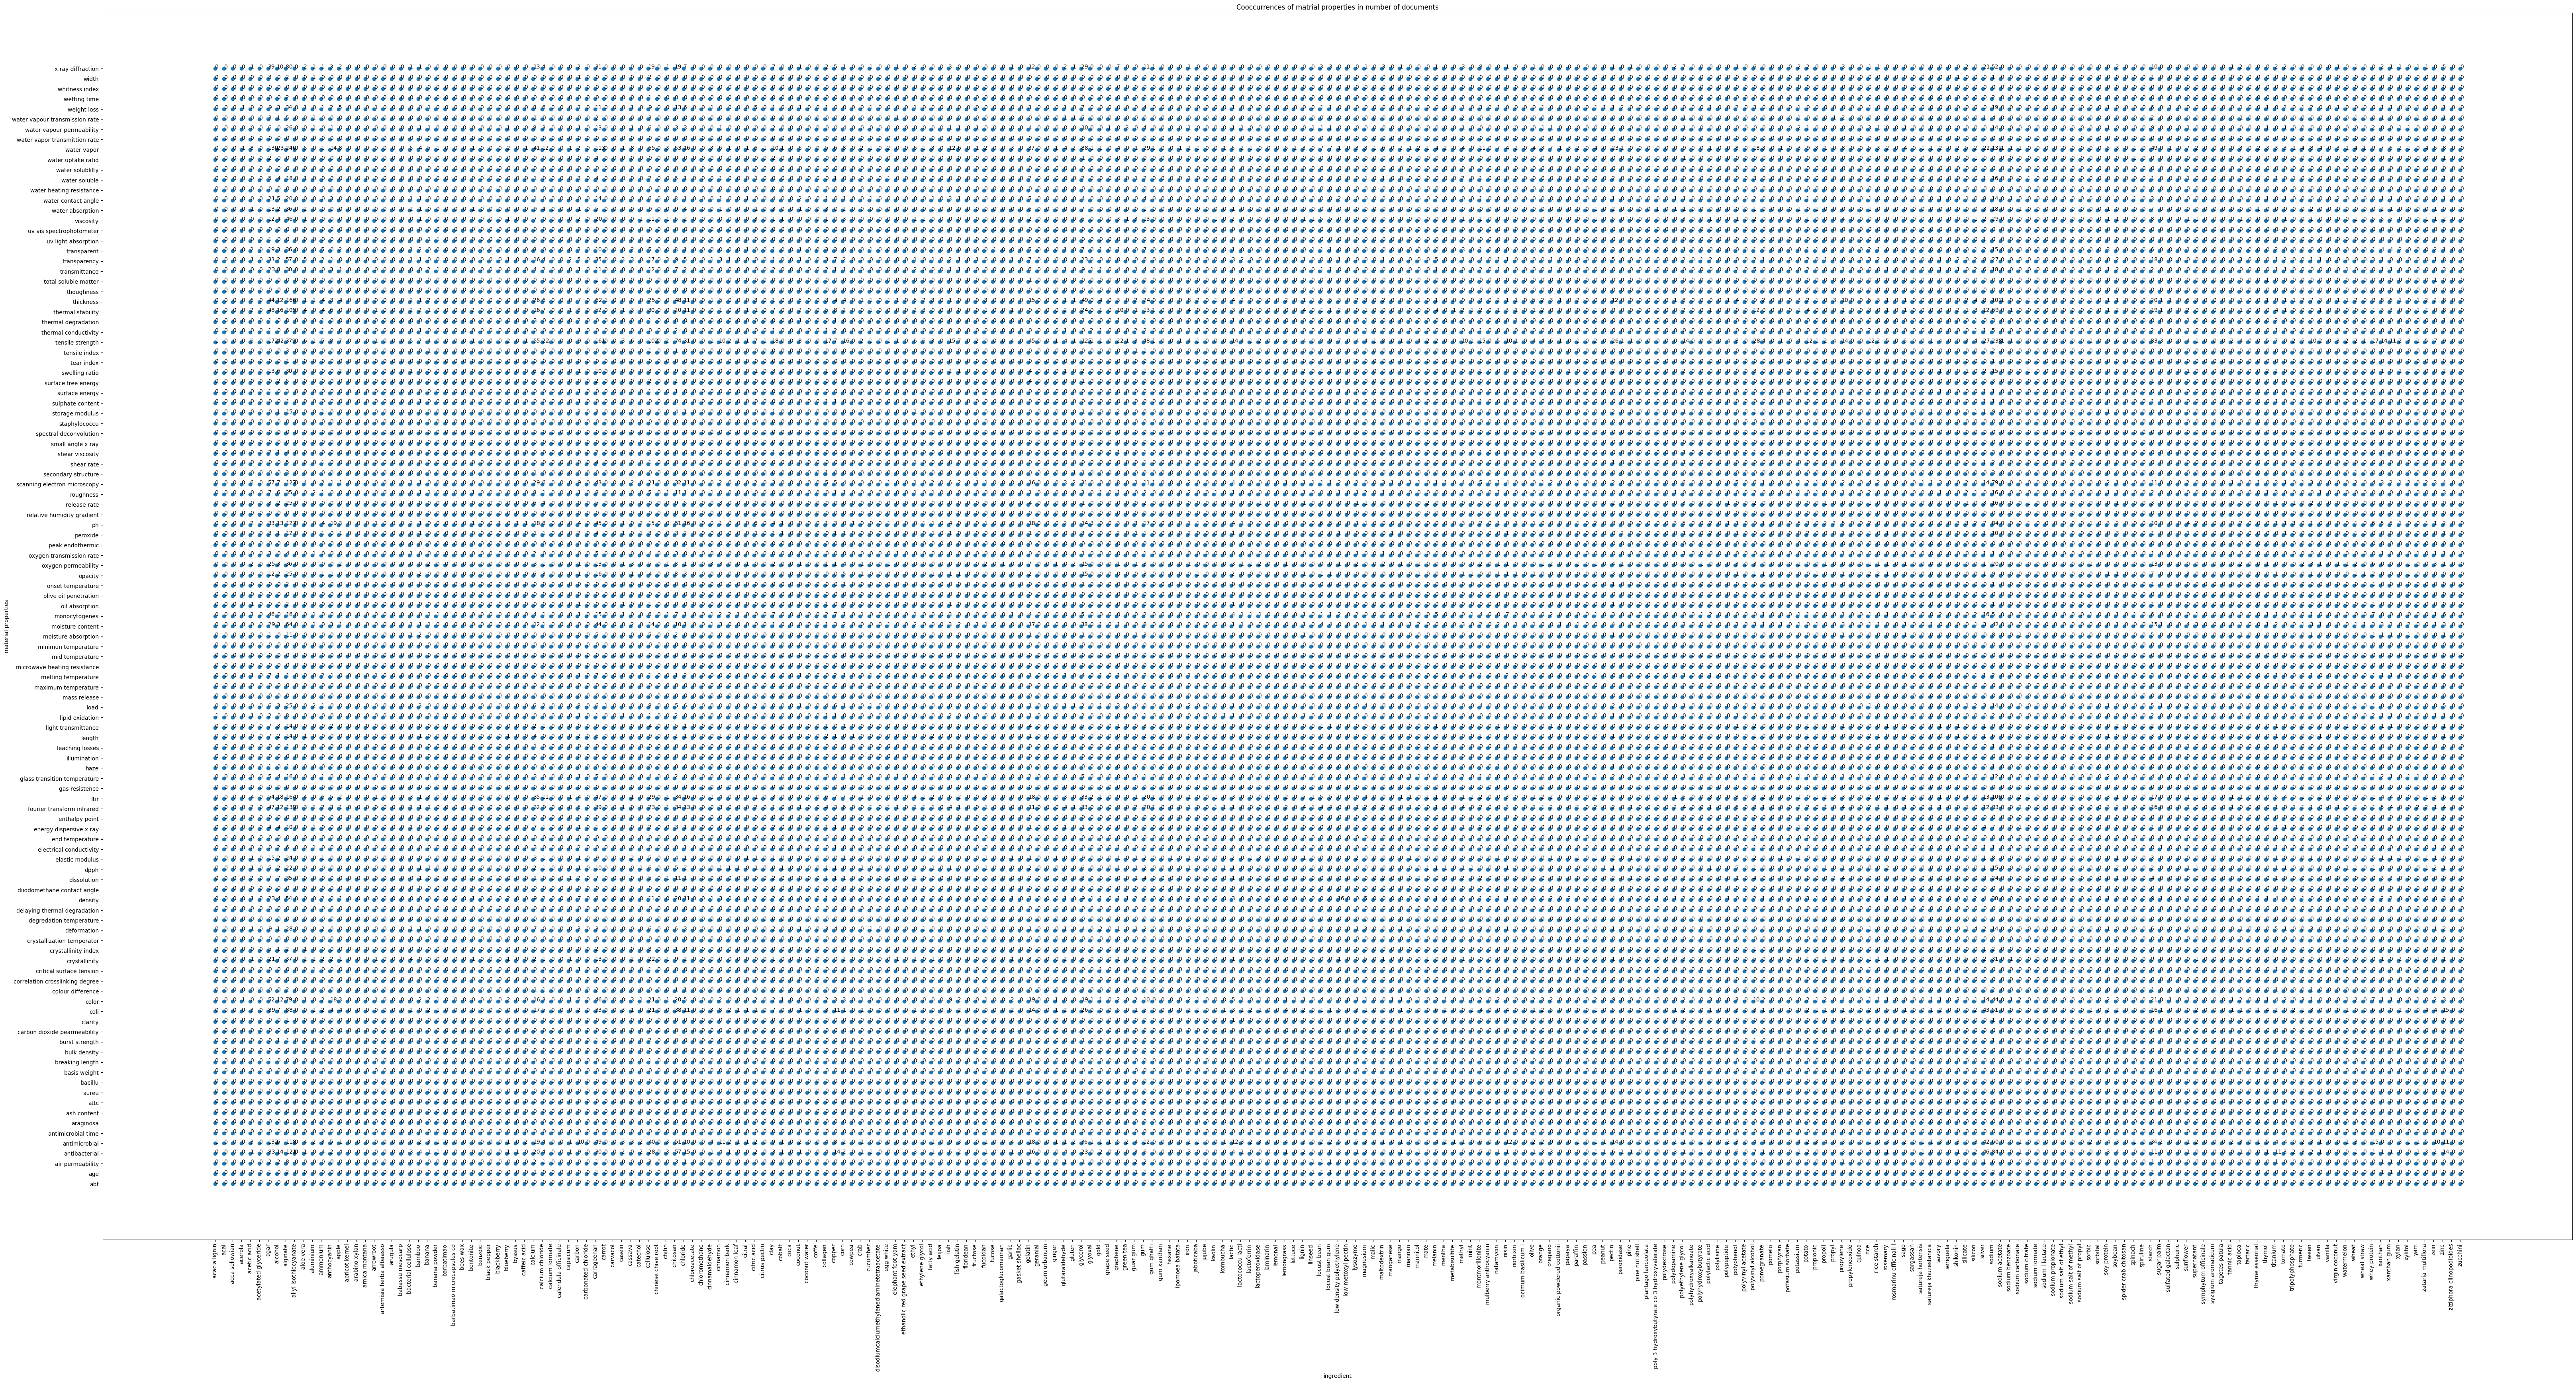

In [319]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
y = lsts
x= lstf
n = lstnum
fig, ax = plt.subplots(figsize = (80,40))
#plt.figure(figsize = (20,20))
ax.scatter(x,y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.title('Cooccurrences of matrial properties in number of documents')
plt.xlabel('ingredient')
plt.ylabel('material properties')
plt.xticks(rotation = 90)
plt.show();

## Building excel sheet

In [320]:
firstc = list(set(lstf))
secondc = list(set(lsts))
firstc.sort()
secondc.sort()
print(len(firstc), len(secondc))

255 111


In [321]:
data = []
i = 0
for firstl in range(len(firstc)):
    row = []
    for secondl in range(len(secondc)):
        value = lstnum[i]
        i = i + 1
        row.append(int(value))
    data.append(row)

In [322]:
print(len(data))
print(data[9][9])

255
0


In [323]:
print(data)

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [324]:
import pandas as pd
dta = data

fd = pd.DataFrame(dta, columns = secondc, index = firstc)
display(fd.head(10))
fd.shape

,abt,age,air permeability,antibacterial,antimicrobial,antimicrobial time,araginosa,ash content,attc,aureu,...,water uptake ratio,water vapor,water vapor transmittion rate,water vapour permeability,water vapour transmission rate,weight loss,wetting time,whitness index,width,x ray diffraction
acacia lignin,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acca sellowian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acerola,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
acetic acid,0,0,0,1,3,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,1
acetylated glyceride,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agar,0,1,2,83,132,0,0,0,0,0,...,2,130,0,6,3,9,0,0,3,39
alcohol,0,0,2,14,6,0,0,0,0,0,...,0,23,0,0,1,3,0,0,0,10
alginate,0,2,8,121,118,0,0,0,0,0,...,0,246,0,26,5,34,2,0,2,80
allyl isothiocyanate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(255, 111)

In [325]:
nooftimes('acetic acid', 'antimicrobial activity')

0

In [326]:
nooftimes('agar', 'antimicrobial activity')

0

In [327]:
nooftimes('agar', 'antimicrobial')

132

In [328]:
nooftimes('agar', 'antioxidant')

0

In [329]:
nooftimes('acerola puree', 'adhesion')

0

### Saving in the excel sheet

In [330]:
fd.to_excel('lcooccurrence_ing_vs_matprop_v9.xlsx')

<a id= "cooccurrence"></a>
### cooccurrence ingprop file

In [331]:
import pandas as pd
import numpy as np
fd = pd.read_excel('lcooccurrence_ing_vs_matprop_v9.xlsx', index_col = 0)
fd.shape

(255, 111)

In [332]:
fd.head(10)

,abt,age,air permeability,antibacterial,antimicrobial,antimicrobial time,araginosa,ash content,attc,aureu,...,water uptake ratio,water vapor,water vapor transmittion rate,water vapour permeability,water vapour transmission rate,weight loss,wetting time,whitness index,width,x ray diffraction
acacia lignin,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acca sellowian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acerola,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
acetic acid,0,0,0,1,3,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,1
acetylated glyceride,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agar,0,1,2,83,132,0,0,0,0,0,...,2,130,0,6,3,9,0,0,3,39
alcohol,0,0,2,14,6,0,0,0,0,0,...,0,23,0,0,1,3,0,0,0,10
alginate,0,2,8,121,118,0,0,0,0,0,...,0,246,0,26,5,34,2,0,2,80
allyl isothiocyanate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
nooftimes('zno', 'antibacterial activity')

0

In [334]:
fd.shape

(255, 111)

### Building excel sheet containing document ids

In [335]:
dataa = []
i = 0
for firstl in range(len(firstc)):
    row = []
    for secondl in range(len(secondc)):
        value = lstid[i]
        i = i + 1
        row.append(value)
    dataa.append(row)

In [336]:
import pandas as pd
data = dataa

dff = pd.DataFrame(data, columns = secondc, index = firstc)
display(dff.head(10))
dff.shape

,abt,age,air permeability,antibacterial,antimicrobial,antimicrobial time,araginosa,ash content,attc,aureu,...,water uptake ratio,water vapor,water vapor transmittion rate,water vapour permeability,water vapour transmission rate,weight loss,wetting time,whitness index,width,x ray diffraction
acacia lignin,[],[],[],[],[1112],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acai,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acca sellowian,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acerola,[],[],[],[],[],[],[],[],[],[],...,[],[1530],[],[],[],[1530],[],[],[],[]
acetic acid,[],[],[],[845],"[634, 1366, 1960]",[],[],[],[],[],...,[],"[52, 182, 634, 845, 1366, 1901, 1929, 1943]",[],[],[],[],[],[],[],[1342]
acetylated glyceride,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
agar,[],[1567],"[1378, 1410]","[11, 30, 129, 142, 180, 185, 210, 216, 218, 225, 279, 296, 323, 329, 461, 46...","[10, 16, 22, 30, 79, 101, 153, 159, 160, 180, 181, 192, 210, 214, 223, 225, ...",[],[],[],[],[],...,"[1464, 1482]","[0, 11, 22, 28, 34, 36, 44, 69, 79, 86, 101, 126, 142, 144, 166, 167, 171, 1...",[],"[327, 345, 844, 1190, 1513, 1784]","[925, 951, 1595]","[160, 166, 211, 581, 706, 890, 1345, 1702, 1752]",[],[],"[279, 1558, 1647]","[10, 16, 22, 36, 166, 167, 171, 208, 323, 454, 455, 496, 535, 560, 640, 678,..."
alcohol,[],[],"[1182, 1744]","[30, 75, 82, 716, 833, 882, 941, 1182, 1231, 1374, 1442, 1681, 1695, 1763]","[30, 833, 920, 941, 1442, 1668]",[],[],[],[],[],...,[],"[28, 61, 82, 140, 163, 182, 193, 217, 449, 611, 882, 919, 920, 999, 1126, 11...",[],[],[1562],"[212, 326, 882]",[],[],[],"[75, 82, 136, 163, 889, 919, 999, 1317, 1386, 1397]"
alginate,[],"[1782, 1956]","[624, 649, 695, 764, 885, 1182, 1744, 1956]","[12, 15, 17, 18, 20, 21, 37, 51, 73, 75, 80, 82, 85, 87, 88, 98, 103, 106, 1...","[15, 22, 27, 33, 37, 38, 49, 53, 68, 73, 88, 95, 98, 100, 115, 123, 125, 131...",[],[],[],[],[],...,[],"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65...",[],"[242, 247, 472, 508, 610, 666, 784, 814, 842, 846, 880, 881, 903, 912, 960, ...","[803, 960, 1078, 1318, 1562]","[15, 29, 45, 137, 164, 183, 220, 261, 292, 379, 418, 597, 662, 706, 720, 850...","[251, 497]",[],"[1092, 1332]","[22, 25, 27, 49, 75, 82, 102, 125, 136, 163, 179, 204, 252, 281, 283, 337, 3..."
allyl isothiocyanate,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


(255, 111)

In [337]:
print(doclst('antimicrobial', 'agar'))

[10, 16, 22, 30, 79, 101, 153, 159, 160, 180, 181, 192, 210, 214, 223, 225, 263, 279, 285, 317, 329, 345, 347, 389, 417, 421, 535, 565, 571, 600, 629, 654, 669, 679, 680, 690, 750, 753, 793, 801, 818, 821, 832, 838, 844, 849, 906, 911, 939, 943, 950, 951, 984, 988, 997, 1000, 1014, 1022, 1066, 1079, 1085, 1106, 1107, 1113, 1127, 1133, 1136, 1165, 1170, 1190, 1224, 1230, 1239, 1260, 1286, 1288, 1289, 1330, 1334, 1341, 1352, 1366, 1375, 1384, 1393, 1408, 1430, 1441, 1459, 1461, 1464, 1485, 1504, 1513, 1542, 1574, 1585, 1586, 1587, 1594, 1595, 1597, 1614, 1618, 1625, 1635, 1638, 1640, 1647, 1652, 1661, 1667, 1679, 1711, 1712, 1714, 1736, 1752, 1770, 1802, 1805, 1806, 1833, 1872, 1878, 1880, 1881, 1883, 1884, 1905, 1935, 1955]


## saving excel sheet

In [338]:
dff.to_excel('ldocid_ing_vs_matprop_v9.xlsx')

In [339]:
import pandas as pd
import numpy as np
dff = pd.read_excel('ldocid_ing_vs_matprop_v9.xlsx', index_col = 0)

In [340]:
dff.head()

,abt,age,air permeability,antibacterial,antimicrobial,antimicrobial time,araginosa,ash content,attc,aureu,...,water uptake ratio,water vapor,water vapor transmittion rate,water vapour permeability,water vapour transmission rate,weight loss,wetting time,whitness index,width,x ray diffraction
acacia lignin,[],[],[],[],[1112],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acai,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acca sellowian,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
acerola,[],[],[],[],[],[],[],[],[],[],...,[],[1530],[],[],[],[1530],[],[],[],[]
acetic acid,[],[],[],[845],"[634, 1366, 1960]",[],[],[],[],[],...,[],"[52, 182, 634, 845, 1366, 1901, 1929, 1943]",[],[],[],[],[],[],[],[1342]


### Functions with 2 material properties/ingredients or a mix of both

In [341]:
def namefun(firstn):
    firstn = ', ' + firstn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    print(len(nidx))

def nameidx(firstn):
    firstn = ', ' + firstn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    return nidx

def nooftimes(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    return(len(nindex))

def twonamefun(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    print(len(nindex))
    return nindex

def doclst(firstn, secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    docitems = df.loc[nindex].doc_id.tolist()
    return docitems

def printdf(firstn , secondn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    
    dataf =  df.loc[nindex]
    dataf = dataf.drop(['Abstract'],axis =1)
    return dataf
    

In [342]:
printdf('color', 'polyvinyl alcohol')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
28,Development of shrimp freshness indicating films by immobilizing red pitaya ...,double-layer film prepared immobilizing red pitaya betacyanins titanium diox...,2022,28,"agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl a...",13.14,", color: 3, tensile strength: 1, thickness: 1, water vapor: 1",4.38,137,", agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl..."
61,Active/intelligent packaging films developed by immobilizing anthocyanins fr...,active/intelligent packaging film developed incorporating purple sweetpotato...,2022,61,"alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust bean...",11.59,", color: 1, ph: 1, tensile strength: 1, water vapor: 1",2.90,138,", alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust be..."
140,Development and comparison of different polysaccharide/PVA-based active/inte...,betacyanin-rich red pitaya flesh extract (rpfe) blended different polysaccha...,2022,140,"alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust bean...",18.06,", color: 1, light transmittance: 1, moisture content: 1, ph: 1, tensile stre...",4.52,155,", alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust be..."
163,Intelligent colorimetric film incorporated with anthocyanins-loaded ovalbumi...,protein-polysaccharide nanocomplexes system could improve low stability of a...,2022,163,"alcohol: 2, alginate: 1, glycerol: 1, polyvinyl alcohol: 2, propylene: 1",6.03,", color: 1, crystallinity: 1, fourier transform infrared: 1, light transmitt...",7.76,116,", alcohol: 2, alginate: 1, glycerol: 1, polyvinyl alcohol: 2, propylene: 1, ..."
217,A visual bi-layer indicator based on roselle anthocyanins with high hydropho...,study designed new type indicator hydrophobic polyvinylidene fluoride (pvdf)...,2021,217,"alcohol: 1, alginate: 1, anthocyanin: 1, polyvinyl alcohol: 1, sodium: 1",4.72,", color: 4, ph: 1, water contact angle: 1, water vapor: 1",6.60,106,", alcohol: 1, alginate: 1, anthocyanin: 1, polyvinyl alcohol: 1, sodium: 1, ..."
265,A visual indicator based on curcumin with high stability for monitoring the ...,ink-free printing method of multifunction ph indicator provided based agar p...,2021,265,"agar: 1, alcohol: 1, polyvinyl alcohol: 1",3.30,", color: 2, ph: 1",3.30,91,", agar: 1, alcohol: 1, polyvinyl alcohol: 1, color: 2, ph: 1"
611,Mechanical and barrier properties of composite films based on kappa-carragee...,optimization of film formula-based kappa-carrageenan polyvinyl alcohol (pva)...,2019,611,"alcohol: 5, carrageenan: 6, polyvinyl alcohol: 5",14.81,", burst strength: 2, color: 1, moisture content: 2, opacity: 2, tensile stre...",12.04,108,", alcohol: 5, carrageenan: 6, polyvinyl alcohol: 5, burst strength: 2, color..."
920,Antimicrobial and antioxidant properties of polyvinyl alcohol bio composite ...,polyvinyl alcohol (pva) film containing seaweed extracted cellulose nanocrys...,2018,920,"alcohol: 1, cellulose: 1, polyvinyl alcohol: 1",2.68,", antimicrobial: 2, color: 1, tensile strength: 1, thermal stability: 1, wat...",5.36,112,", alcohol: 1, cellulose: 1, polyvinyl alcohol: 1, antimicrobial: 2, color: 1..."
1134,Biodegradable films of starch/PVOH/alginate in packaging systems for minimal...,biodegradable packaging may replace non-biodegradable material shelf life of...,2016,1134,"alcohol: 1, alginate: 1, chloride: 1, lemongrass: 1, lettuce: 7, polyvinyl a...",7.65,", color: 1, water vapor: 1",1.18,170,", alcohol: 1, alginate: 1, chloride: 1, lemongrass: 1, lettuce: 7, polyvinyl..."
1668,Physical performance of biodegradable films intended for antimicrobial food ...,antimicrobial film prepared including enterocins alginate polyvinyl alcohol ...,2010,1668,"alcohol: 1, alginate: 1, polyvinyl alcohol: 1, zein: 2",3.73,", antimicrobial: 3, color: 1, tensile strength: 1, water vapor: 1",4.48,134,", alcohol: 1,

In [343]:
nooftimes('color', 'polyvinyl alcohol')

10

In [344]:
def download_pair(firstn, secondn, filename):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    
    dff = df.loc[nindex].copy()
    #display(df.loc[nindex])
    dff = dff.drop('Abstract', axis = 1)
    filename = filename.lower().strip().replace(' ', '_')
    filename = filename + '.csv'
    print(filename, dff.shape)
    display(dff)
    return dff.to_csv(filename) 

In [345]:
"""download_pair('color','polyvinyl alcohol','c pva')"""

"download_pair('color','polyvinyl alcohol','c pva')"

<a id= "3fun"></a>
## Functions with 3 material properties
<a href="#top">Back to top</a>

In [346]:
def nooftimes3(firstn, secondn, thirdn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    thirdn = ', ' + thirdn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nidx = df.loc[nidx][df.loc[nidx].mix.str.contains(thirdn,na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    return(len(nindex))

def twonamefun3(firstn, secondn,thirdn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    thirdn = ', ' + thirdn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nidx = df.loc[nidx][df.loc[nidx].mix.str.contains(thirdn,na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    print(len(nindex))
    return nindex

def doclst3(firstn, secondn,thirdn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    thirdn = ', ' + thirdn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nidx = df.loc[nidx][df.loc[nidx].mix.str.contains(thirdn,na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    docitems = df.loc[nindex].doc_id.tolist()
    return docitems

def printdf3(firstn , secondn, thirdn):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    thirdn = ', ' + thirdn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nidx = df.loc[nidx][df.loc[nidx].mix.str.contains(thirdn,na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    dataf =  df.loc[nindex]
    dataf = dataf.drop(['Abstract'],axis =1)
    return dataf

In [347]:
nooftimes('color', 'water vapor')

94

In [348]:
nooftimes3('color', 'agar', 'tensile strength')

33

In [349]:
print(doclst('color', 'gum'))

[28, 61, 140, 719, 1024, 1089, 1442, 1648, 1908, 1936]


In [350]:
print(doclst3('color', 'water vapor', 'gum'))

[28, 61, 140, 1024]


In [351]:
printdf('color', 'gum')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
28,Development of shrimp freshness indicating films by immobilizing red pitaya ...,double-layer film prepared immobilizing red pitaya betacyanins titanium diox...,2022,28,"agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl a...",13.14,", color: 3, tensile strength: 1, thickness: 1, water vapor: 1",4.38,137,", agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl..."
61,Active/intelligent packaging films developed by immobilizing anthocyanins fr...,active/intelligent packaging film developed incorporating purple sweetpotato...,2022,61,"alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust bean...",11.59,", color: 1, ph: 1, tensile strength: 1, water vapor: 1",2.90,138,", alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust be..."
140,Development and comparison of different polysaccharide/PVA-based active/inte...,betacyanin-rich red pitaya flesh extract (rpfe) blended different polysaccha...,2022,140,"alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust bean...",18.06,", color: 1, light transmittance: 1, moisture content: 1, ph: 1, tensile stre...",4.52,155,", alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust be..."
719,Smart wound dressing based on κ–carrageenan/locust bean gum/cranberry extrac...,smart wound dressing based carrageenan (κc) locust bean gum (lbg) cranberry ...,2019,719,"carrageenan: 1, gum: 1, locust bean: 1, locust bean gum: 1",3.45,", aureus: 1, color: 2, ph: 3, staphylococcus: 1",6.03,116,", carrageenan: 1, gum: 1, locust bean: 1, locust bean gum: 1, aureus: 1, col..."
1024,Active gellan gum/purple sweet potato composite films capable of monitoring ...,purple sweet potato (psp) root crop containing higher level of certain nutri...,2017,1024,"agar: 1, anthocyanin: 4, gum: 4, potato: 1",6.17,", coli: 1, color: 2, ph: 3, water vapor: 1",4.32,162,", agar: 1, anthocyanin: 4, gum: 4, potato: 1, coli: 1, color: 2, ph: 3, wate..."
1089,Influence of plasticizer content on organoleptic; physico-chemical and stren...,biodegradable edible film developed alternative packaging materials. due uni...,2017,1089,"agar: 3, apple: 4, carrageenan: 1, gum: 4, xanthan: 4, xanthan gum: 4",15.27,", color: 1, tensile strength: 1",1.53,131,", agar: 3, apple: 4, carrageenan: 1, gum: 4, xanthan: 4, xanthan gum: 4, col..."
1442,3rd International Conference on Chemical Engineering and Advanced Materials;...,proceeding contain 576 papers. special focus conference energy development e...,2013,1442,"alcohol: 1, bamboo: 1, carbon: 4, carrageenan: 1, catechol: 1, cellulose: 1,...",2.98,", antibacterial: 4, antimicrobial: 1, color: 1, dpph: 1, peroxide: 1, ph: 1,...",1.15,872,", alcohol: 1, bamboo: 1, carbon: 4, carrageenan: 1, catechol: 1, cellulose: ..."
1648,Properties; applications and current development of edible polysaccharide fi...,moisture oxygen carbon dioxide lipid flavor and/or aroma transfer food compo...,2011,1648,"carbon: 1, cellulose: 1, chitosan: 1, gum: 2, pectin: 1, starch: 1",3.55,", antimicrobial: 1, color: 1, water vapour permeability: 1",1.52,197,", carbon: 1, cellulose: 1, chitosan: 1, gum: 2, pectin: 1, starch: 1, antimi..."
1908,Effect of hydrocolloids on the dehydration kinetics; color; and texture of m...,tray drying of mango pulp carried prepare mango leather dehydration behavior...,2003,1908,"alginate: 1, cellulose: 1, guar gum: 2, gum: 3, mango: 10, pectin: 3, sodium: 1",15.44,", color: 2, deformation: 2",2.94,136,", alginate: 1, cellulose: 1, guar gum: 2, gum: 3, mango: 10, pectin: 3, sodi..."
1936,Hydrocolloid coating of cheeses,semi-hard dry white brined cheese coated hydrocolloid film based κ-carrageen...,2000,1936,"alginate: 2, carrageenan: 2, gum: 2",2.26,", color: 1, deformation: 1, ph: 1, roughness: 2, weight loss: 4",3.40,265,", alginate: 2, carrageenan: 2, gum: 2, color: 1, deformation: 1, ph: 1, r

In [352]:
printdf3('color', 'water vapor', 'gum')

,Title,original_abs,Year,doc_id,word_freq,bow_percent,mat_prop,mat_percent,numwords,mix
28,Development of shrimp freshness indicating films by immobilizing red pitaya ...,double-layer film prepared immobilizing red pitaya betacyanins titanium diox...,2022,28,"agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl a...",13.14,", color: 3, tensile strength: 1, thickness: 1, water vapor: 1",4.38,137,", agar: 2, alcohol: 4, gum: 2, locust bean: 2, locust bean gum: 2, polyvinyl..."
61,Active/intelligent packaging films developed by immobilizing anthocyanins fr...,active/intelligent packaging film developed incorporating purple sweetpotato...,2022,61,"alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust bean...",11.59,", color: 1, ph: 1, tensile strength: 1, water vapor: 1",2.90,138,", alcohol: 3, anthocyanin: 5, carrageenan: 1, chitosan: 1, gum: 1, locust be..."
140,Development and comparison of different polysaccharide/PVA-based active/inte...,betacyanin-rich red pitaya flesh extract (rpfe) blended different polysaccha...,2022,140,"alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust bean...",18.06,", color: 1, light transmittance: 1, moisture content: 1, ph: 1, tensile stre...",4.52,155,", alcohol: 1, carrageenan: 4, chitosan: 4, gum: 6, locust bean: 6, locust be..."
1024,Active gellan gum/purple sweet potato composite films capable of monitoring ...,purple sweet potato (psp) root crop containing higher level of certain nutri...,2017,1024,"agar: 1, anthocyanin: 4, gum: 4, potato: 1",6.17,", coli: 1, color: 2, ph: 3, water vapor: 1",4.32,162,", agar: 1, anthocyanin: 4, gum: 4, potato: 1, coli: 1, color: 2, ph: 3, wate..."


### Download function for 3 material properties
download_triplet

In [353]:
def download_triplet(firstn, secondn, thirdn, filename):
    firstn = ', ' + firstn.lower().strip() + ':'
    secondn = ', ' + secondn.lower().strip() + ':'
    thirdn = ', ' + thirdn.lower().strip() + ':'
    nidx = df[df.mix.str.contains(firstn, na=False)].index.tolist()
    nidx = df.loc[nidx][df.loc[nidx].mix.str.contains(thirdn,na=False)].index.tolist()
    nindex = df.loc[nidx][df.loc[nidx].mix.str.contains(secondn, na=False)].index.tolist()
    
    dff = df.loc[nindex].copy()
    #display(df.loc[nindex])
    dff = dff.drop('Abstract', axis = 1)
    filename = filename.lower().strip().replace(' ', '_')
    filename = filename + '.csv'
    print(filename, dff.shape)
    display(dff)
    return dff.to_csv(filename) 

In [354]:
"""download_pair('color', 'water vapor', 'c w')"""

"download_pair('color', 'water vapor', 'c w')"

In [355]:
"""download_triplet('color', 'water vapor', 'gum', 'c w ts')"""

"download_triplet('color', 'water vapor', 'gum', 'c w ts')"

In [356]:
print(len(valdict))
111*255

28305


28305

In [357]:
valdict

{'acacia lignin+abt*[]': 0,
 'acacia lignin+age*[]': 0,
 'acacia lignin+air permeability*[]': 0,
 'acacia lignin+antibacterial*[]': 0,
 'acacia lignin+antimicrobial*[1112]': 1,
 'acacia lignin+antimicrobial time*[]': 0,
 'acacia lignin+araginosa*[]': 0,
 'acacia lignin+ash content*[]': 0,
 'acacia lignin+attc*[]': 0,
 'acacia lignin+aureu*[]': 0,
 'acacia lignin+bacillu*[]': 0,
 'acacia lignin+basis weight*[]': 0,
 'acacia lignin+breaking length*[]': 0,
 'acacia lignin+bulk density*[]': 0,
 'acacia lignin+burst strength*[]': 0,
 'acacia lignin+carbon dioxide pearmeability*[]': 0,
 'acacia lignin+clarity*[]': 0,
 'acacia lignin+coli*[]': 0,
 'acacia lignin+color*[]': 0,
 'acacia lignin+colour difference*[]': 0,
 'acacia lignin+correlation crosslinking degree*[]': 0,
 'acacia lignin+critical surface tension*[]': 0,
 'acacia lignin+crystallinity*[]': 0,
 'acacia lignin+crystallinity index*[]': 0,
 'acacia lignin+crystallization temperator*[]': 0,
 'acacia lignin+deformation*[]': 0,
 'acac

In [358]:
ingdf = pd.DataFrame(list(valdict.items()), columns = ['content', 'times'])
ingdf = ingdf.sort_values(by=['times'], ascending = False)
print(ingdf.shape)
ingdf.head()

(28305, 2)


,content,times
971,"alginate+tensile strength*[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50...",379
990,"alginate+water vapor*[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 5...",246
22394,"sodium+tensile strength*[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65,...",238
749,"agar+tensile strength*[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 1...",172
975,"alginate+thickness*[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134...",166


In [359]:
ingdf.head(2)

,content,times
971,"alginate+tensile strength*[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50...",379
990,"alginate+water vapor*[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 5...",246


In [360]:
ingdf[['name', 'docids']] = ingdf['content'].str.split('*', expand = True)
ingdf = ingdf[['name', 'times', 'docids']]
ingdf

,name,times,docids
971,alginate+tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
990,alginate+water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
22394,sodium+tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
749,agar+tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
975,alginate+thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."
...,...,...,...
10074,garlic+thermal conductivity,0,[]
10072,garlic+tensile index,0,[]
10071,garlic+tear index,0,[]
10070,garlic+swelling ratio,0,[]


In [361]:
mm = ingdf[ingdf.name.str.contains('\+tensile sodium', na = False)].name.tolist()
print(mm)
print(len(mm))

[]
0


In [362]:
def rearrange(txt):
    nlst = txt.split('+')
    nlst.sort()
    newstr = nlst[0] + '+'
    newstr = newstr + nlst[1]
    return newstr

text = 'strength+tensile strength'
print(rearrange(text))

text = 'strength+mechanical'
print(rearrange(text))

strength+tensile strength
mechanical+strength


In [363]:
"""ingdf['name'] = ingdf['name'].apply(lambda x: rearrange(x))
ingdf.head(10)"""

"ingdf['name'] = ingdf['name'].apply(lambda x: rearrange(x))\ningdf.head(10)"

In [364]:
# checking duplicates
print(ingdf.duplicated().sum())
# removing duplicates
print(ingdf.shape)
ingdf.drop_duplicates(inplace = True)
print(ingdf.shape)

0
(28305, 3)
(28305, 3)


In [365]:
ingdf[['ingredient', 'property']] = ingdf['name'].str.split('+', expand = True)
ingdf = ingdf.drop('name', axis =1)
ingdf = ingdf[['ingredient', 'property', 'times', 'docids']]
ingdf.index = np.arange(ingdf.shape[0])
print(ingdf.shape)
ingdf.head(10)

(28305, 4)


,ingredient,property,times,docids
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."
5,alginate,ftir,164,"[2, 27, 31, 48, 49, 53, 64, 68, 69, 87, 93, 102, 121, 123, 134, 145, 177, 20..."
6,carrageenan,tensile strength,161,"[3, 58, 61, 62, 77, 81, 94, 112, 132, 140, 141, 162, 165, 172, 173, 176, 187..."
7,alginate,fourier transform infrared,139,"[25, 27, 42, 53, 64, 76, 82, 93, 102, 117, 121, 122, 135, 136, 145, 163, 179..."
8,agar,antimicrobial,132,"[10, 16, 22, 30, 79, 101, 153, 159, 160, 180, 181, 192, 210, 214, 223, 225, ..."
9,sodium,water vapor,131,"[2, 8, 18, 25, 29, 34, 36, 37, 39, 53, 54, 57, 65, 66, 72, 82, 84, 89, 93, 1..."


In [366]:
# Removing all the rows with no cooccurrences
print(ingdf.shape)
ingdf = ingdf.query('times != 0')
print(ingdf.shape)

(28305, 4)
(3343, 4)


In [367]:
print(ingdf.shape)
ingdf.to_excel('lhighest_ing_vs_matprop_v9.xlsx', index = False)

(3343, 4)


In [368]:
testmat = pd.read_excel('lhighest_ing_vs_matprop_v9.xlsx')
print(testmat.shape)
testmat.head()

(3343, 4)


,ingredient,property,times,docids
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."


In [369]:
testmat.property.unique()

array(['tensile strength', 'water vapor', 'thickness', 'ftir',
       'fourier transform infrared', 'antimicrobial', 'ph',
       'scanning electron microscopy', 'antibacterial',
       'thermal stability', 'coli', 'x ray diffraction', 'color',
       'moisture content', 'transparency', 'density', 'monocytogenes',
       'viscosity', 'crystallinity', 'oxygen permeability', 'transparent',
       'water absorption', 'roughness', 'dissolution', 'weight loss',
       'transmittance', 'swelling ratio', 'deformation',
       'water vapour permeability', 'opacity', 'release rate', 'load',
       'elastic modulus', 'dpph', 'water contact angle', 'water soluble',
       'glass transition temperature', 'storage modulus', 'length',
       'light transmittance', 'peroxide', 'moisture absorption',
       'energy dispersive x ray', 'crystallinity index',
       'thermal degradation', 'air permeability', 'lipid oxidation',
       'melting temperature', 'thermal conductivity',
       'electrical condu

In [370]:
testmat.query('times > 100')[:10][['property', 'times']]

,property,times
0,tensile strength,379
1,water vapor,246
2,tensile strength,238
3,tensile strength,172
4,thickness,166
5,ftir,164
6,tensile strength,161
7,fourier transform infrared,139
8,antimicrobial,132
9,water vapor,131


In [371]:
testmat

,ingredient,property,times,docids
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."
...,...,...,...,...
3338,satureja khuzestanica,scanning electron microscopy,1,[630]
3339,savory,swelling ratio,1,[690]
3340,fish,transmittance,1,[1063]
3341,rice starch,water vapour permeability,1,[1108]


In [372]:
tt = ingdf.drop('docids', axis = 1)
tt = tt[:40]
print(tt.shape)
tt.head()
tt.to_csv('ltop_ing_vs_matprop_v9.csv', index = False)
testing = pd.read_csv('ltop_ing_vs_matprop_v9.csv')
print(testing.shape)
testing.head()

(40, 3)
(40, 3)


,ingredient,property,times
0,alginate,tensile strength,379
1,alginate,water vapor,246
2,sodium,tensile strength,238
3,agar,tensile strength,172
4,alginate,thickness,166


## Ingredient Ingredient

In [373]:
iidf = pd.read_excel('lhighest_ing_vs_matprop_v9.xlsx')
print(iidf.shape)
iidf.head()

(3343, 4)


,ingredient,property,times,docids
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."


In [374]:
iidf = pd.read_excel('lhighest_ing_vs_ing_v9.xlsx')
print(iidf.shape)
iidf.head()

(2254, 4)


,first,second,times,docids
0,alginate,sodium,610,"[2, 6, 8, 12, 15, 18, 20, 21, 24, 25, 27, 29, 35, 37, 39, 42, 50, 53, 54, 55..."
1,alginate,chitosan,204,"[8, 12, 17, 32, 35, 38, 50, 57, 64, 73, 78, 82, 92, 98, 103, 119, 128, 137, ..."
2,alginate,calcium,197,"[14, 17, 67, 69, 85, 98, 105, 119, 122, 139, 149, 196, 219, 221, 227, 243, 2..."
3,alginate,cellulose,152,"[2, 8, 9, 15, 32, 57, 66, 73, 83, 90, 154, 177, 183, 187, 192, 196, 204, 205..."
4,alginate,glycerol,116,"[24, 27, 37, 42, 69, 76, 98, 102, 131, 135, 139, 150, 161, 163, 165, 196, 20..."


## Functions

In [375]:
def combingtopropclass(ing):
    frame = list()
    for ig in ing:
        print(ig)
        sdf = testmat.query('ingredient == @ig')[['ingredient', 'property', 'times']]
        #print(sdf.shape)
        sdf['prop_class'] = sdf['property'].apply(lambda x: matdict[x])
        #display(sdf)
        newdf = sdf[['prop_class', 'times']]
        #display(newdf)
        newdf.index = newdf['prop_class'].tolist()
        newdf.drop(['prop_class'], axis = 1, inplace = True)
        newdf = newdf.sum(level = 0)
        frame.append(newdf)
    finaldf = pd.concat(frame)
    finaldf = finaldf.sum(level = 0)
    finaldf = finaldf.sort_values('times', ascending = False)
    return finaldf

In [376]:
def ingtopropclass(ing):
    frame = list()
    for ig in ing:
        print(ig)
        sdf = testmat.query('ingredient == @ig')[['ingredient', 'property', 'times']]
        #print(sdf.shape)
        #sdf['prop_class'] = sdf['property'].apply(lambda x: matdict[x])
        #display(sdf)
        newdf = sdf[['property', 'times']]
        #display(newdf)
        newdf.index = newdf['property'].tolist()
        newdf.drop(['property'], axis = 1, inplace = True)
        #newdf = newdf.sum(level = 0)
        frame.append(newdf)
    finaldf = pd.concat(frame)
    
    finaldf = finaldf.sum(level = 0)
    finaldf = finaldf.sort_values('times', ascending = False)
    #display(finaldf)
    return finaldf

In [377]:
sa = ingtopropclass(['sodium', 'agar'])
sa

sodium
agar


,times
tensile strength,410
water vapor,261
antimicrobial,192
antibacterial,167
ftir,160
...,...
tear index,1
burst strength,1
clarity,1
leaching losses,1


In [378]:
def iidict(ing):
    ii = combingtopropclass(ing)
    dt = ii.to_dict()
    for k,v in dt.items():
        finalvalue = v
        
    return finalvalue

In [379]:
def iimatpropdict(ing):
    ii = ingtopropclass(ing)
    dt = ii.to_dict()
    for k,v in dt.items():
        finalvalue = v
        
    return finalvalue

In [380]:
iidf

,first,second,times,docids
0,alginate,sodium,610,"[2, 6, 8, 12, 15, 18, 20, 21, 24, 25, 27, 29, 35, 37, 39, 42, 50, 53, 54, 55..."
1,alginate,chitosan,204,"[8, 12, 17, 32, 35, 38, 50, 57, 64, 73, 78, 82, 92, 98, 103, 119, 128, 137, ..."
2,alginate,calcium,197,"[14, 17, 67, 69, 85, 98, 105, 119, 122, 139, 149, 196, 219, 221, 227, 243, 2..."
3,alginate,cellulose,152,"[2, 8, 9, 15, 32, 57, 66, 73, 83, 90, 154, 177, 183, 187, 192, 196, 204, 205..."
4,alginate,glycerol,116,"[24, 27, 37, 42, 69, 76, 98, 102, 131, 135, 139, 150, 161, 163, 165, 196, 20..."
...,...,...,...,...
2249,agar,aloe vera,1,[500]
2250,acerola,alginate,1,[1530]
2251,ammonium,anthocyanin,1,[62]
2252,acacia lignin,alginate,1,[1112]


In [381]:
iidf = iidf[['first', 'second', 'times']]
iidf.head()

,first,second,times
0,alginate,sodium,610
1,alginate,chitosan,204
2,alginate,calcium,197
3,alginate,cellulose,152
4,alginate,glycerol,116


In [382]:
flst = iidf['first'].tolist()
slst = iidf['second'].tolist()
print(len(flst), len(slst))

2254 2254


In [383]:
dictclasslst = []
dictmplst = []
for i in range(len(flst)):
    dictclasslst.append(iidict([flst[i], slst[i]]))
    dictmplst.append(iimatpropdict([flst[i], slst[i]]))

Streaming output truncated to the last 5000 lines.
polylactic acid
sodium
polylactic acid
sodium
soy protein
wheat
soy protein
wheat
agar
thymol
agar
thymol
agar
rice starch
agar
rice starch
orange
titanium
orange
titanium
orange
starch
orange
starch
orange
polyphenol
orange
polyphenol
agar
sodium carbonate
agar
sodium carbonate
sodium
yam
sodium
yam
agar
sugar palm
agar
sugar palm
soybean
sunflower
soybean
sunflower
agar
zein
agar
zein
agar
olive
agar
olive
oregano
starch
oregano
starch
pectin
xylan
pectin
xylan
agar
polydopamine
agar
polydopamine
rice
titanium
rice
titanium
polydopamine
silver
polydopamine
silver
polyethylene glycol
starch
polyethylene glycol
starch
nisin
starch
nisin
starch
methyl
rice
methyl
rice
wheat
wheat straw
wheat
wheat straw
polyethylene glycol
silver
polyethylene glycol
silver
pectin
wheat
pectin
wheat
acetic acid
whey protein
acetic acid
whey protein
soybean
starch
soybean
starch
peroxidase
polyphenol
peroxidase
polyphenol
methyl
xanthan
methyl
xanthan
pec

In [384]:
iidf['material_class_prop'] = dictclasslst
iidf['material_property'] = dictmplst

In [385]:
iidf

,first,second,times,material_class_prop,material_property
0,alginate,sodium,610,"{'chemical': 972, 'mechanical': 790, 'physical': 690, 'optical': 577, 'antim...","{'tensile strength': 617, 'water vapor': 377, 'ftir': 270, 'thickness': 267,..."
1,alginate,chitosan,204,"{'chemical': 747, 'mechanical': 597, 'physical': 537, 'antimicrobial': 496, ...","{'tensile strength': 453, 'water vapor': 309, 'thickness': 214, 'ftir': 198,..."
2,alginate,calcium,197,"{'chemical': 694, 'mechanical': 575, 'physical': 495, 'optical': 454, 'antim...","{'tensile strength': 434, 'water vapor': 287, 'ftir': 199, 'thickness': 192,..."
3,alginate,cellulose,152,"{'chemical': 697, 'mechanical': 626, 'physical': 523, 'optical': 456, 'antim...","{'tensile strength': 481, 'water vapor': 311, 'ftir': 193, 'thickness': 191,..."
4,alginate,glycerol,116,"{'chemical': 729, 'mechanical': 640, 'physical': 520, 'optical': 484, 'barri...","{'tensile strength': 504, 'water vapor': 334, 'thickness': 215, 'ftir': 197,..."
...,...,...,...,...,...
2249,agar,aloe vera,1,"{'antimicrobial': 355, 'mechanical': 216, 'optical': 216, 'chemical': 209, '...","{'tensile strength': 178, 'antimicrobial': 136, 'water vapor': 135, 'coli': ..."
2250,acerola,alginate,1,"{'chemical': 591, 'mechanical': 496, 'physical': 421, 'optical': 373, 'antim...","{'tensile strength': 379, 'water vapor': 247, 'thickness': 166, 'ftir': 164,..."
2251,ammonium,anthocyanin,1,"{'chemical': 41, 'optical': 38, 'antimicrobial': 20, 'mechanical': 18, 'phys...","{'ph': 23, 'color': 20, 'water vapor': 15, 'tensile strength': 13, 'ftir': 1..."
2252,acacia lignin,alginate,1,"{'chemical': 592, 'mechanical': 497, 'physical': 421, 'optical': 372, 'antim...","{'tensile strength': 380, 'water vapor': 246, 'thickness': 166, 'ftir': 164,..."


In [386]:
iidf.loc[[2253]]['material_class_prop'].tolist()

[{'chemical': 79,
  'mechanical': 63,
  'physical': 50,
  'optical': 46,
  'barrier': 39,
  'antimicrobial': 37,
  'thermal': 24,
  'rheological': 13,
  'antioxidant': 4,
  'biodegradability': 3,
  'electrical': 2}]

# Proof

In [387]:
## Both material_class_prop and material_property has the same number of occurances
idxvalue = 1
xx = iidf.loc[[idxvalue]]['material_class_prop'].tolist()[0]
smu = 0
for k, v in xx.items():
    #print(v)
    smu = smu + v
print(smu)
xx = iidf.loc[[idxvalue]]['material_property'].tolist()[0]
smu = 0
for k, v in xx.items():
    #print(v)
    smu = smu + v
print(smu)

3649
3649


## Saving ..


In [388]:
iidf.to_csv('ing_ing_matpropclass_v9.csv')

In [389]:
df = pd.read_csv('ing_ing_matpropclass_v9.csv',index_col = [0])
df.head()

,first,second,times,material_class_prop,material_property
0,alginate,sodium,610,"{'chemical': 972, 'mechanical': 790, 'physical': 690, 'optical': 577, 'antim...","{'tensile strength': 617, 'water vapor': 377, 'ftir': 270, 'thickness': 267,..."
1,alginate,chitosan,204,"{'chemical': 747, 'mechanical': 597, 'physical': 537, 'antimicrobial': 496, ...","{'tensile strength': 453, 'water vapor': 309, 'thickness': 214, 'ftir': 198,..."
2,alginate,calcium,197,"{'chemical': 694, 'mechanical': 575, 'physical': 495, 'optical': 454, 'antim...","{'tensile strength': 434, 'water vapor': 287, 'ftir': 199, 'thickness': 192,..."
3,alginate,cellulose,152,"{'chemical': 697, 'mechanical': 626, 'physical': 523, 'optical': 456, 'antim...","{'tensile strength': 481, 'water vapor': 311, 'ftir': 193, 'thickness': 191,..."
4,alginate,glycerol,116,"{'chemical': 729, 'mechanical': 640, 'physical': 520, 'optical': 484, 'barri...","{'tensile strength': 504, 'water vapor': 334, 'thickness': 215, 'ftir': 197,..."


## Function

### iigetmp : give it two ingredients in a list format
iigetmp : stands for: ingredient, ingredient, get, material property
Coloring text, could be done with website or in later versions.

In [390]:
def iigetmp(lst):
    f = lst[0]
    s = lst[1]
    df = pd.read_csv('ing_ing_matpropclass_v9.csv',index_col = [0])
    finaldf = df.query('first == @f and second == @s')
    return finaldf

In [391]:
iigetmp(['alginate', 'sodium'])

,first,second,times,material_class_prop,material_property
0,alginate,sodium,610,"{'chemical': 972, 'mechanical': 790, 'physical': 690, 'optical': 577, 'antim...","{'tensile strength': 617, 'water vapor': 377, 'ftir': 270, 'thickness': 267,..."


In [392]:
iigetmp(['agar', 'cassava'])

,first,second,times,material_class_prop,material_property
157,agar,cassava,10,"{'antimicrobial': 354, 'mechanical': 218, 'optical': 216, 'chemical': 203, '...","{'tensile strength': 178, 'water vapor': 138, 'antimicrobial': 135, 'coli': ..."


In [393]:
## Download
def downloadiigetmp(lst, filename):
    dff = iigetmp(lst)
    filename = filename.replace(' ', '_')
    filename = filename + '.csv'
    display(dff)
    dff.to_csv(filename)

In [394]:
downloadiigetmp(['alginate', 'sodium'], 'alginate_sodium')

,first,second,times,material_class_prop,material_property
0,alginate,sodium,610,"{'chemical': 972, 'mechanical': 790, 'physical': 690, 'optical': 577, 'antim...","{'tensile strength': 617, 'water vapor': 377, 'ftir': 270, 'thickness': 267,..."


# Fresh Work
## First-Second-Cooccurence

In [395]:
dfoc = pd.read_excel('lhighest_ing_vs_matprop_v9.xlsx')
print(dfoc.shape)
dfoc.head()

(3343, 4)


,ingredient,property,times,docids
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."


In [396]:
tic = pd.read_csv('lem_top_ingcounts_v9.csv', index_col = [0])
print(tic.shape)
tic.head()

(255, 6)


,total_occurrence,no_documents,repeat_percent,nonrepeat_percent,per_corpus,docids
alginate,2760,1161,0.99823,0.41991,58.05,"[2, 4, 5, 6, 8, 9, 12, 14, 15, 17, 18, 20, 21, 22, 24, 25, 27, 29, 31, 32, 3..."
sodium,1110,649,0.40146,0.23473,32.45,"[2, 6, 8, 12, 15, 18, 20, 21, 24, 25, 27, 29, 34, 35, 36, 37, 39, 42, 50, 53..."
agar,1013,410,0.36638,0.14829,20.50,"[0, 10, 11, 16, 22, 28, 30, 34, 36, 44, 60, 69, 70, 79, 86, 101, 126, 129, 1..."
carrageenan,924,366,0.33419,0.13237,18.30,"[3, 7, 8, 9, 19, 26, 58, 61, 62, 77, 81, 94, 104, 109, 110, 112, 130, 132, 1..."
chitosan,776,291,0.28066,0.10525,14.55,"[8, 12, 17, 30, 32, 35, 38, 43, 50, 57, 61, 64, 73, 78, 82, 92, 98, 99, 103,..."


In [397]:
tmc = pd.read_csv('lem_top_mpcounts_v9.csv', index_col = [0])
print(tic.shape)
tic.head()

(255, 6)


,total_occurrence,no_documents,repeat_percent,nonrepeat_percent,per_corpus,docids
alginate,2760,1161,0.99823,0.41991,58.05,"[2, 4, 5, 6, 8, 9, 12, 14, 15, 17, 18, 20, 21, 22, 24, 25, 27, 29, 31, 32, 3..."
sodium,1110,649,0.40146,0.23473,32.45,"[2, 6, 8, 12, 15, 18, 20, 21, 24, 25, 27, 29, 34, 35, 36, 37, 39, 42, 50, 53..."
agar,1013,410,0.36638,0.14829,20.50,"[0, 10, 11, 16, 22, 28, 30, 34, 36, 44, 60, 69, 70, 79, 86, 101, 126, 129, 1..."
carrageenan,924,366,0.33419,0.13237,18.30,"[3, 7, 8, 9, 19, 26, 58, 61, 62, 77, 81, 94, 104, 109, 110, 112, 130, 132, 1..."
chitosan,776,291,0.28066,0.10525,14.55,"[8, 12, 17, 30, 32, 35, 38, 43, 50, 57, 61, 64, 73, 78, 82, 92, 98, 99, 103,..."


In [398]:
# adding required columns
idxlst = dfoc.index.tolist()
for idx in idxlst:
    #print(dfoc.loc[idx]['first'])
    firstval = dfoc.loc[idx]['ingredient']
    secondval = dfoc.loc[idx]['property']
    #print(firstval, secondval)
    dfoc.loc[[idx], 'ingredient_toc']  = int(tic.loc[[firstval]]['total_occurrence'].values[0])
    dfoc.loc[[idx], 'ingredient_nod']  = int(tic.loc[[firstval]]['no_documents'].values[0])
    dfoc.loc[[idx], 'property_toc'] = int(tmc.loc[[secondval]]['total_occurrence'].values[0])
    dfoc.loc[[idx], 'property_nod'] = int(tmc.loc[[secondval]]['no_documents'].values[0])

In [399]:
dfoc.head()

,ingredient,property,times,docids,ingredient_toc,ingredient_nod,property_toc,property_nod
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ...",2760.0,1161.0,882.0,714.0
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65...",2760.0,1161.0,637.0,488.0
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,...",1110.0,649.0,882.0,714.0
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167...",1013.0,410.0,882.0,714.0
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20...",2760.0,1161.0,370.0,282.0


In [400]:
## Converting into interger
dfoc['ingredient_toc'] = dfoc['ingredient_toc'].apply(np.int64)
dfoc['ingredient_nod'] = dfoc['ingredient_nod'].apply(np.int64)
dfoc['property_toc'] = dfoc['property_toc'].apply(np.int64)
dfoc['property_nod'] = dfoc['property_nod'].apply(np.int64)
## Changing column name
dfoc.rename(columns = {'times':'cooccurence'}, inplace = True)
dfoc.head(10)

,ingredient,property,cooccurence,docids,ingredient_toc,ingredient_nod,property_toc,property_nod
0,alginate,tensile strength,379,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ...",2760,1161,882,714
1,alginate,water vapor,246,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65...",2760,1161,637,488
2,sodium,tensile strength,238,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,...",1110,649,882,714
3,agar,tensile strength,172,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167...",1013,410,882,714
4,alginate,thickness,166,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20...",2760,1161,370,282
5,alginate,ftir,164,"[2, 27, 31, 48, 49, 53, 64, 68, 69, 87, 93, 102, 121, 123, 134, 145, 177, 20...",2760,1161,311,272
6,carrageenan,tensile strength,161,"[3, 58, 61, 62, 77, 81, 94, 112, 132, 140, 141, 162, 165, 172, 173, 176, 187...",924,366,882,714
7,alginate,fourier transform infrared,139,"[25, 27, 42, 53, 64, 76, 82, 93, 102, 117, 121, 122, 135, 136, 145, 163, 179...",2760,1161,231,229
8,agar,antimicrobial,132,"[10, 16, 22, 30, 79, 101, 153, 159, 160, 180, 181, 192, 210, 214, 223, 225, ...",1013,410,628,300
9,sodium,water vapor,131,"[2, 8, 18, 25, 29, 34, 36, 37, 39, 53, 54, 57, 65, 66, 72, 82, 84, 89, 93, 1...",1110,649,637,488


## Ingclass

In [401]:
dff = pd.read_excel('BagofWord_2_improved_v9.xlsx', sheet_name="Ingredients")
print(dff.shape)
display(dff.head())

#*******************
#*******************
import string
punct = string.punctuation
print(type(punct))
print(punct)

def remove_punctuation(txt):
    txt = txt.lower().strip()
    for pun in punct:
        txt = txt.replace(pun,' ').replace('  ', ' ')
    return txt

def singular_abs(ingr):
    ingr = remove_punctuation(ingr)
    component = ingr.split(' ')
    text = ' '
    wordlst = ['this', 'is', 'was', 'as', 'does', 'lets', "let's", 'yours', 'has', 'his', 'thats', "that's", '']
    for comp in component:
        if(comp in wordlst):
            singular = comp
        elif (comp[-1] == "s" ):
            if(comp[-2:] == "ss" or comp[-2:] == "es"):
                singular = comp
            elif(comp[-3:] == "gas" or comp[-3:] =="ies" or comp[-3:] =="cfs" or comp[-3:] =="vis" or comp[-3:] == "sis"):
                singular = comp
            elif(comp[-4:] == "znps"):
                singular = comp
            elif(comp[-5:] == "cocas"):
                singular = comp
            elif(comp[-6:] == "citrus"):
                singular = comp
            elif(comp[-7:] == "modulus" or comp[-7:] =="byssus"):
                singular = comp
            
            else:
                singular = comp[:-1]
        else:
            singular = comp
        text = text + singular + ' '
    text = remove_punctuation(text)
    text = text.lower().strip().replace('  ', ' ')
    return text
###############
###############
dff['Class'] = dff['Class'].apply(lambda x: singular_abs(x.lower().strip()))
dff['Component'] = dff['Component'].apply(lambda x: singular_abs(x.lower().strip()))
print(dff.shape)
display(dff.sample(2))
print('----'*20)
ingredientdict = dict(zip(dff['Component'], dff.Class))
print(len(ingredientdict))
print('****'*20)
ingdict = dict((singular_abs(remove_punctuation(k.lower().strip())), singular_abs(remove_punctuation(v.lower().strip()))) for k,v in ingredientdict.items())
print(len(ingdict), ingdict)
complst = list(ingdict.keys())
print('\n'+ '***'*20,'\n')
print(len(complst), complst)
print('\n'+ '***'*20,'\n')
classlst = list(ingdict.values())
print(len(classlst), classlst)

(354, 6)


,Class,Class_secondary,Component,Variant,Abbreviation/Other,Unnamed: 5
0,Organic compounds,Organic compounds,Acacia lignin,Acacia lignin,NaN,NaN
1,Organic compounds,Organic compounds,Acai,Acai,NaN,NaN
2,Organic compounds,Organic compounds,Acca sellowian,Acca sellowian,NaN,NaN
3,Organic compounds,Organic compounds,Acerola,Acerola,NaN,NaN
4,Organic compounds,Organic compounds - acid,Acetic acid,Acetic acid,NaN,NaN


<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
(354, 6)


,Class,Class_secondary,Component,Variant,Abbreviation/Other,Unnamed: 5
108,polysaccharides,Polysaccharides - starch,cowpea,Cowpea,NaN,NaN
136,polysaccharides,Polysaccharides - cellulose - plant,galactoglucomannan,acetyl galactoglucomannan,AcGGM,NaN


--------------------------------------------------------------------------------
255
********************************************************************************
255 {'acacia lignin': 'organic compound', 'acai': 'organic compound', 'acca sellowian': 'organic compound', 'acerola': 'organic compound', 'acetic acid': 'organic compound', 'acetylated glyceride': 'organic compound', 'agar': 'polysaccharides', 'alcohol': 'organic compound', 'alginate': 'polysaccharides', 'allyl isothiocyanate': 'organic compound', 'aloe vera': 'organic compound', 'aluminium': 'inorganic compound', 'ammonium': 'inorganic compound', 'anthocyanin': 'organic compound', 'apple': 'organic compound', 'apricot kernel': 'organic compound', 'arabino xylan': 'polysaccharides', 'arnica montana': 'organic compound', 'arrowroot': 'polysaccharides', 'artemisia herba albaasso': 'organic compound', 'arugula': 'organic compound', 'babassu mesocarp': 'organic compound', 'bacterial cellulose': 'polysaccharides', 'bamboo': 'o

## Matpropclass

In [402]:
dff = pd.read_excel('BagofWord_2_improved_v9.xlsx', sheet_name="Properties")
dff.head(2)
import string
punct = string.punctuation
print(type(punct))
print(punct)

def remove_punctuation(txt):
    txt = txt.lower().strip()
    for pun in punct:
        txt = txt.replace(pun,' ').replace('  ', ' ')
    return txt

def singular_abs(ingr):
    ingr = remove_punctuation(ingr)
    component = ingr.split(' ')
    text = ' '
    wordlst = ['this', 'is', 'was', 'as', 'does', 'lets', "let's", 'yours', 'has', 'his', 'thats', "that's", '']
    for comp in component:
        if(comp in wordlst):
            singular = comp
        elif (comp[-1] == "s" ):
            if(comp[-2:] == "ss" or comp[-2:] == "es"):
                singular = comp
            elif(comp[-3:] == "gas" or comp[-3:] =="ies" or comp[-3:] =="cfs" or comp[-3:] =="vis" or comp[-3:] == "sis"):
                singular = comp
            elif(comp[-4:] == "znps"):
                singular = comp
            elif(comp[-5:] == "cocas"):
                singular = comp
            elif(comp[-6:] == "citrus"):
                singular = comp
            elif(comp[-7:] == "modulus" or comp[-7:] =="byssus"):
                singular = comp
            
            else:
                singular = comp[:-1]
        else:
            singular = comp
        text = text + singular + ' '
    text = remove_punctuation(text)
    text = text.lower().strip().replace('  ', ' ')
    return text

dff['Material property'] = dff['Material property'].apply(lambda x: singular_abs(x.lower().strip()))
dff['Class'] = dff['Class'].apply(lambda x: singular_abs(x.lower().strip()))


materialdict = dict(zip(dff['Material property'], dff.Class))
print(len(materialdict))
print(materialdict)

<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
111
{'antibacterial': 'antimicrobial', 'antimicrobial': 'antimicrobial', 'antimicrobial time': 'antimicrobial', 'staphylococcu': 'antimicrobial', 'bacillu': 'antimicrobial', 'coli': 'antimicrobial', 'aureu': 'antimicrobial', 'araginosa': 'antimicrobial', 'monocytogenes': 'antimicrobial', 'leaching losses': 'antioxidant', 'peroxide': 'antioxidant', 'attc': 'antioxidant', 'dpph': 'antioxidant', 'abt': 'antioxidant', 'water vapor': 'barrier', 'carbon dioxide pearmeability': 'barrier', 'critical surface tension': 'barrier', 'water vapour permeability': 'barrier', 'air permeability': 'barrier', 'olive oil penetration': 'barrier', 'water vapour transmission rate': 'barrier', 'oxygen permeability': 'barrier', 'oxygen transmission rate': 'barrier', 'gas resistence': 'barrier', 'water vapor transmittion rate': 'barrier', 'weight loss': 'biodegradability', 'ph': 'chemical', 'small angle x ray': 'chemical', 'x ray diffraction': 'chemical', 'energy di

In [403]:
dfoc.sample()

,ingredient,property,cooccurence,docids,ingredient_toc,ingredient_nod,property_toc,property_nod
2510,ammonium,glass transition temperature,1,[1775],22,21,31,30


In [404]:
## Adding class
dfoc['ingredient_class'] = dfoc['ingredient'].apply(lambda x: ingdict[x])
dfoc['property_class'] = dfoc['property'].apply(lambda x: materialdict[x])
## Rearranging
dfoc = dfoc[['ingredient', 'ingredient_toc', 'ingredient_nod', 'ingredient_class', 'property', 'property_toc', 'property_nod', 'cooccurence', 'property_class', 'docids']]
dfoc.sample()

,ingredient,ingredient_toc,ingredient_nod,ingredient_class,property,property_toc,property_nod,cooccurence,property_class,docids
1337,locust bean gum,27,19,organic compound,antimicrobial,628,300,2,antimicrobial,"[421, 1457]"


In [405]:
## Download
dfoc.to_csv('lem_ifirst_mpsecond_cooccurence_v9.csv', index = False)

In [406]:
#Read
import pandas as pd
import numpy as np
ffd = pd.read_csv('lem_ifirst_mpsecond_cooccurence_v9.csv')
ffd.shape

(3343, 10)

In [407]:
ffd.head()

,ingredient,ingredient_toc,ingredient_nod,ingredient_class,property,property_toc,property_nod,cooccurence,property_class,docids
0,alginate,2760,1161,polysaccharides,tensile strength,882,714,379,mechanical,"[5, 12, 14, 21, 22, 25, 27, 33, 37, 40, 42, 45, 50, 51, 53, 54, 57, 65, 66, ..."
1,alginate,2760,1161,polysaccharides,water vapor,637,488,246,barrier,"[2, 4, 8, 14, 18, 22, 25, 29, 33, 37, 39, 48, 49, 51, 52, 53, 54, 57, 64, 65..."
2,sodium,1110,649,inorganic compound,tensile strength,882,714,238,mechanical,"[12, 21, 25, 27, 34, 36, 37, 42, 50, 53, 54, 57, 65, 66, 71, 72, 80, 82, 89,..."
3,agar,1013,410,polysaccharides,tensile strength,882,714,172,mechanical,"[16, 22, 28, 34, 36, 69, 70, 79, 101, 129, 135, 144, 147, 153, 158, 166, 167..."
4,alginate,2760,1161,polysaccharides,thickness,370,282,166,physical,"[22, 37, 40, 45, 71, 87, 95, 100, 105, 118, 125, 127, 134, 150, 165, 191, 20..."


## Heatmap

In [408]:
def gen_heatmap(df, samsize):
    dff = df.iloc[:samsize][df.columns.tolist()[:samsize]]
    sb.heatmap(dff,  cmap  = 'viridis', annot=True, fmt=".0f")
    sb.set(rc={'figure.figsize':(20,15)})